In [1]:
import tutorenvs
from tutorenvs.utils import DataShopLogger
from tutorenvs.multicolumn_std import MultiColumnAddition
from tutorenvs.trainer import AuthorTrainer

In [2]:
edge_case_set = [
    ["777", "777"],
    ["773", "773"],
    ["737", "737"],
    ["377", "377"],
    ["337", "337"],
    ["733", "733"], # missing in CHI2020
    ["333", "333"], # missing in CHI2020
    ["999", "001"],
    ["999", "010"],
    ["999", "100"],
    ["999", "111"],
    ["999", "011"],
    ["999", "110"],
    ["999", "101"],
]

training_set = [
    ["534", "698"],
    ["872", "371"],
    ["839", "445"],
    ["287", "134"],
    ["643", "534"],
    ["248", "137"],
    ["234", "142"],
    ["539", "461"],
    ["433", "576"],
    ["764", "335"],
    ["533", "698"],
]

extra = [
    # ["777", "777"],
    # ["999", "101"],
    # ["999", "111"],
    # ["999", "001"],
]

In [3]:
def log_completeness(agent, profile='ground_truth.txt', log=[]):
    log.append(agent.eval_completeness(profile))


def run_training(agent, logger_name='MulticolumnAddition', n=10,
                 n_columns=3, author_train=True, carry_zero=True):
    logger = DataShopLogger(logger_name, extra_kcs=['field'])
    problem_set = training_set + extra + training_set   #[["777", "777"], ["666", "666"], ["777","777"]]

    env = MultiColumnAddition(check_how=False, check_args=True,
            demo_args=True, demo_how=True, n_digits=n_columns,
            carry_zero=carry_zero)

    # make_completeness_profile(env, training_set+edge_case_set, 'exp_z_ground_truth.txt')
    trainer = AuthorTrainer(agent, env, logger=logger,
                problem_set=problem_set)#, n_problems=n)
    c_log = []
    profile = "exp_z_ground_truth.txt" if carry_zero else "ground_truth.txt"
    trainer.on_problem_end = lambda : log_completeness(agent, profile, log=c_log)

    # else:
    #     env = MultiColumnAddition(check_how=False, check_args=False, demo_args=True, demo_how=True, n_digits=n_columns)
    #     trainer = Trainer(agent, env, logger=logger, problem_set=problem_set, n_problems=n)
    trainer.start()
    for i, obj in enumerate(c_log):
        print(f"corr={obj['correctness']*100:2.2f}%, compl={obj['completeness']*100:.2f}%")
    return c_log
    

In [4]:
from apprentice.agents.cre_agents.cre_agent import CREAgent
agent_args = {
    "search_depth" : 2,
    "where_learner": "antiunify",
    # "where_learner": "mostspecific",
    # "when_learner": "sklearndecisiontree",    
    
    "planner" : "setchaining",
    "function_set" : ["OnesDigit","TensDigit","Add","Add3"],
    "feature_set" : [],
    #"feature_set" : ['Equals'],
    
    "extra_features" : ["SkillCandidates","Match"],
    "find_neighbors" : True,
    "when_args": {"encode_relative" : True},
}

dt_args = {
    "when_learner": "decisiontree",
}
stand_args = {
    "when_learner": "stand",
    "which_learner": "when_prediction",
    "action_chooser" : "max_which_utility",
    "suggest_uncert_neg" : True,
}

stand_relaxed_args = {**stand_args,
    "when_args" : {
        **agent_args['when_args'],
        "split_choice" : "all_near_max"
    }
}

import numpy as np
import matplotlib.pyplot as plt

markers = ['+', '.', 'o']
def plot_cmp(d, title):
    for i, (label, prof) in enumerate(d.items()):
        
        cmp = [d['completeness'] for d in prof]
        plt.plot(np.arange(1,len(cmp)+1), cmp, label=label, marker=markers[i])
    plt.title(title)
    plt.xlabel('Problem #')
    plt.ylabel('Post-Problem Completeness')
    plt.legend(loc="lower right")
    plt.ylim(-0.05, 1.05)
    plt.axhline(1.0, linestyle='--', color="#dddddd99")
    plt.show()



CRE Cache Lives Here:  /home/danny/.cache/cre/cre_cache


/home/danny/.local/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/danny/.local/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


unicode_type


/home/danny/.local/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


## Carry Zero

In [5]:
dt_agent = CREAgent(**agent_args, **dt_args)
log_dt_cz = run_training(dt_agent)

STARTING PROBLEM ['534', '698']
TensDigit(f8(a.value) + f8(a.value) + f8(a.value)) [TextField(id='inpB1', value='8', locked=True)]
TensDigit(f8(a.value) + f8(a.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
OnesDigit(f8(a.value) + f8(a.value) + f8(a.value)) [TextField(id='inpA1', value='4', locked=True)]
OnesDigit(f8(a.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
--FUNCS--
s(OnesDigit(f8(a.value) + f8(b.value))) ['inpB1', 'inpA1']
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) ['inpB1', 'inpA1']
EXPLAIN TIME: 1100.407959 ms
INDUCE SKILL Skill_eUmOF(OnesDigit(a + b)) s(OnesDigit(f8(a.value) + f8(b.value)))


/home/danny/.local/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


('out1', 'UpdateTextField', {'value': '2'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
TensDigit(f8(a.value) + f8(b.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
TensDigit(f8(a.value) + f8(a.value)) [TextField(id='inpB1', value='8', locked=True)]
TensDigit(f8(a.value) + f8(a.value) + f8(a.value)) [TextField(id='inpA1', value='4', locked=True)]
TensDigit(f8(a.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
--FUNCS--
s(TensDigit(f8(a.value) + f8(b.value))) ['inpB1', 'inpA1']
s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) ['inpB1', 'inpA1']
EXPLAIN TIME: 23.873535 ms
INDUCE SKILL Skill_PZOfg(TensDigit(a + b)) s(TensDigit(f8(a.value) + f8(b.value)))
HINT: out1 -> {'value': '2'}
HINT: carry1 -> {'value': '1'}
APPLY: out1 -> {'value': '2'}
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHE

HINT: out4 -> {'value': '1'}
APPLY: out4 -> {'value': '1'}
--FUNCS--
-1 []
EXPLAIN TIME: 222.612793 ms
INDUCE SKILL Skill_PrIjs(-1) -1
HINT: done -> {'value': -1}
APPLY: done -> {'value': -1}
('carry2', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '2'}) False
CHECK: -1 Skill_4py9T(TensDigit(a + b + c))(carry2, carry1, inpB2, inpA2) -> SAI(carry2, UpdateTextField, {'value': '1'}) [TextField(id='carry1', value='1', locked=True), TextField(id='inpB2', value='9', locked=True), TextField(id='inpA2', value='3', locked=True)]
('out2', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '2'}) False
CHECK: -1 Skill_mVteA(OnesDigit(a + b + c))(out2, carry1, inpB2, inpA2) -> SAI(out2, UpdateTextField, {'value': '3'}) [TextField(id='carry1', value='1', locked=True), TextField(id='inpB2', value='9', locked=True), TextField(id='inpA2', value='3', locked=True)]
('out1', 'UpdateTextField', {'value': '2'}) ('out1', 'UpdateTextField', {'value': '2'}) True

56 >> 248 + 137
AGENT:
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
----------------------

57 >> 248 + 137
AGENT:
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

58 >> 248 + 137
AGENT:
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
----------------------

62 >> 248 + 137
AGENT:
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

63 >> 248 + 137
AGENT:
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

64 >> 248 + 137
AGENT:
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
----------------------

65 >> 248 + 

195 >> 333 + 333
AGENT:
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

196 >> 333 + 333
AGENT:
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

197 >> 333 + 333
AGENT:
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

199 >> 999 + 001
AGENT:
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

200 >> 999 + 001
AGENT:
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

201 >> 999 + 001
AGENT:
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

210 >> 999 + 010
AGENT:
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', '

('out3', 'UpdateTextField', {'value': '1'}) ('out2', 'UpdateTextField', {'value': '4'}) False
('out2', 'UpdateTextField', {'value': '4'}) ('out2', 'UpdateTextField', {'value': '4'}) True
('out1', 'UpdateTextField', {'value': '3'}) ('out2', 'UpdateTextField', {'value': '4'}) False
('carry2', 'UpdateTextField', {'value': '1'}) ('out2', 'UpdateTextField', {'value': '4'}) False
('done', 'PressButton', {'value': -1}) ('out2', 'UpdateTextField', {'value': '4'}) False
s(OnesDigit(f8(a.value) + f8(a.value))) [TextField(id='inpA2', value='7', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA2', value='7', locked=True), TextField(id='inpB2', value='7', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB2', value='7', locked=True), TextField(id='inpA2', value='7', locked=True)]
s(OnesDigit(f8(a.value) + f8(a.value))) [TextField(id='inpB2', value='7', locked=True)]
CAND SAI(out2, UpdateTextField, {'value': '4'}) Target SAI(out2, UpdateTextField, {'valu

43 >> 287 + 134
AGENT:
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

45 >> 643 + 534
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

46 >> 643 + 534
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

48 >> 643 + 534
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 

174 >> 337 + 337
AGENT:
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

175 >> 337 + 337
AGENT:
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

177 >> 733 + 733
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

178 >> 733 + 733
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

180 >> 733 + 733
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:

CORRECT: out4 -> {'value': '1'}
APPLY: out4 -> {'value': '1'}
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
CHECK: 1 Skill_PrIjs(-1)(done) -> SAI(done, PressButton, {'value': -1}) []
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
--SKILLS--
-1 done []
EXPLAIN TIME: 1.361572 ms
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
('carry3', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '4'}) False
CHECK: -1 Skill_PZOfg(TensDigit(a + b))(carry3, inpB3, inpA3) -> SAI(carry3, UpdateTextField, {'value': '1'}) [TextField(id='inpB3', value='4', locked=True), TextField(id='inpA3', value='8', locked=True)]
('out1', 'UpdateTextField', {'value': '4'}) ('out1', 'UpdateTextField', {'value': '4'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '4'}) [TextField(id='inpB1', value='5', locked=True), TextField(id='inpA1', value='9', locked=Tr

39 >> 287 + 134
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

40 >> 287 + 134
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

42 >> 287 + 134
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
TRUTH:
{'selection': 'out3', 'action_type': '

148 >> 737 + 737
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

159 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

161 >> 377 + 377
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'carry3', 'acti

238 >> 999 + 111
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

240 >> 999 + 111
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

244 >> 999 + 011
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_t

s(TensDigit(f8(a.value) + f8(b.value))) out2 ['inpB2', 'inpA2']
EXPLAIN TIME: 5.302002 ms
('out3', 'UpdateTextField', {'value': '3'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('carry2', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
('carry3', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('done', 'PressButton', {'value': -1}) ('carry1', 'UpdateTextField', {'value': '1'}) False
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA1', value='7', locked=True), TextField(id='inpB1', value='4', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB1', value='4', locked=True), TextField(id='inpA1', value='7', locked=True)]
CAND SAI(carry1, UpdateTextField, {'value': '1'}) Target SAI(car

50 >> 643 + 534
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
----------------------

72 >> 234 + 142
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
----------------------

105 >> 764 + 335
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

182 >> 733 + 733
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['248', '137']
('out1', 'UpdateTextField', {'value': '5'}) ('out1', 'UpdateTextField', {'value': '5'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '5'}) [TextField(id='inpB1', value='7', locked=True), TextField(id='inpA1', value='8', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '5'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='7', locked=True), TextField(id='inpA1', value='8', locked=True)]
('out3', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '5'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('out1', 'UpdateTextField', {'value': '5'}) False
('out1', 'UpdateTextField', {'value': '5'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['234', '142']
('out1', 'UpdateTextField', {'value': '6'}) ('out1', 'UpdateTextField', {'value': '6'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '6'}) [TextField(id='inpB1', value='2', locked=True), TextField(id='inpA1', value='4', locked=True)]
('carry1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '6'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='2', locked=True), TextField(id='inpA1', value='4', locked=True)]
('out3', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '6'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('out1', 'UpdateTextField', {'value': '6'}) False
('out1', 'UpdateTextField', {'value': '6'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['539', '461']
('out1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='9', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '0'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='9', locked=True)]
('out3', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '0'}) False
('out2', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '0'}) False
('out1', 'UpdateTextField', {'value': '0'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['433', '576']
('out1', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '9'}) [TextField(id='inpB1', value='6', locked=True), TextField(id='inpA1', value='3', locked=True)]
('carry1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='6', locked=True), TextField(id='inpA1', value='3', locked=True)]
('out3', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('out2', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('out1', 'UpdateTextField', {'value': '9'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['764', '335']
('out1', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '9'}) [TextField(id='inpB1', value='5', locked=True), TextField(id='inpA1', value='4', locked=True)]
('carry1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='5', locked=True), TextField(id='inpA1', value='4', locked=True)]
('out3', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('out2', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('out1', 'UpdateTextField', {'value': '9'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['533', '698']
('out1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='3', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='3', locked=True)]
('out3', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '2'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out1', 'UpdateTextField', {'value': '1'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['534', '698']
('out1', 'UpdateTextField', {'value': '2'}) ('out1', 'UpdateTextField', {'value': '2'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '2'}) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '2'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
('out3', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '2'}) False
('out2', 'UpdateTextField', {'value': '2'}) ('out1', 'UpdateTextField', {'value': '2'}) False
('out1', 'UpdateTextField', {'value': '2'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['872', '371']
('out1', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '3'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '3'}) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='2', locked=True)]
('carry1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '3'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='2', locked=True)]
('out3', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '3'}) False
('out2', 'UpdateTextField', {'value': '4'}) ('out1', 'UpdateTextField', {'value': '3'}) False
('out1', 'UpdateTextField', {'value': '3'}) (

s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='carry2', value='1', locked=True), TextField(id='inpB3', value='3', locked=True), TextField(id='inpA3', value='8', locked=True)]
CAND SAI(out3, UpdateTextField, {'value': '2'}) Target SAI(out3, UpdateTextField, {'value': '2'})
CAND SAI(out3, UpdateTextField, {'value': '2'}) Target SAI(out3, UpdateTextField, {'value': '2'})
CAND SAI(out3, UpdateTextField, {'value': '2'}) Target SAI(out3, UpdateTextField, {'value': '2'})
CAND SAI(out3, UpdateTextField, {'value': '2'}) Target SAI(out3, UpdateTextField, {'value': '2'})
CAND SAI(out3, UpdateTextField, {'value': '2'}) Target SAI(out3, UpdateTextField, {'value': '2'})
CAND SAI(out3, UpdateTextField, {'value': '2'}) Target SAI(out3, UpdateTextField, {'value': '2'})
s(TensDigit(f8(a.value) + f8(a.value) + f8(a.value))) [TextField(id='inpA3', value='8', locked=True)]
--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out3 ['carry2', 'inpB3', 'inpA3']
EXPLAIN TIME: 

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['287', '134']
('out1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='4', locked=True), TextField(id='inpA1', value='7', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='4', locked=True), TextField(id='inpA1', value='7', locked=True)]
('out3', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out1', 'UpdateTextField', {'value': '1'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['643', '534']
('out1', 'UpdateTextField', {'value': '7'}) ('out1', 'UpdateTextField', {'value': '7'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '7'}) [TextField(id='inpB1', value='4', locked=True), TextField(id='inpA1', value='3', locked=True)]
('carry1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '7'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='4', locked=True), TextField(id='inpA1', value='3', locked=True)]
('out3', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '7'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('out1', 'UpdateTextField', {'value': '7'}) False
('out1', 'UpdateTextField', {'value': '7'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['248', '137']
('out1', 'UpdateTextField', {'value': '5'}) ('out1', 'UpdateTextField', {'value': '5'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '5'}) [TextField(id='inpB1', value='7', locked=True), TextField(id='inpA1', value='8', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '5'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='7', locked=True), TextField(id='inpA1', value='8', locked=True)]
('out3', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '5'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('out1', 'UpdateTextField', {'value': '5'}) False
('out1', 'UpdateTextField', {'value': '5'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['234', '142']
('out1', 'UpdateTextField', {'value': '6'}) ('out1', 'UpdateTextField', {'value': '6'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '6'}) [TextField(id='inpB1', value='2', locked=True), TextField(id='inpA1', value='4', locked=True)]
('carry1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '6'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='2', locked=True), TextField(id='inpA1', value='4', locked=True)]
('out3', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '6'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('out1', 'UpdateTextField', {'value': '6'}) False
('out1', 'UpdateTextField', {'value': '6'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['539', '461']
('out1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='9', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '0'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='9', locked=True)]
('out3', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '0'}) False
('out2', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '0'}) False
('out1', 'UpdateTextField', {'value': '0'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['433', '576']
('out1', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '9'}) [TextField(id='inpB1', value='6', locked=True), TextField(id='inpA1', value='3', locked=True)]
('carry1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='6', locked=True), TextField(id='inpA1', value='3', locked=True)]
('out3', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('out2', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('out1', 'UpdateTextField', {'value': '9'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['764', '335']
('out1', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '9'}) [TextField(id='inpB1', value='5', locked=True), TextField(id='inpA1', value='4', locked=True)]
('carry1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='5', locked=True), TextField(id='inpA1', value='4', locked=True)]
('out3', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('out2', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('out1', 'UpdateTextField', {'value': '9'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['533', '698']
('out1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_eUmOF(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='3', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_PZOfg(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='3', locked=True)]
('out3', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '2'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out1', 'UpdateTextField', {'value': '1'}) (

Correctness : 100.00%
Completeness : 100.00%
TOTALS  (correct:291, incorrect:19, hint:17, assistance:36)
PERCENTS(correct:88.99%, incorrect:5.81%, hint:5.20%, assistance:11.01%)
corr=48.73%, compl=48.73%
corr=75.64%, compl=57.45%
corr=87.27%, compl=64.00%
corr=97.82%, compl=97.82%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%


In [6]:
stand_agent = CREAgent(**agent_args, **stand_args)
log_stand_cz = run_training(stand_agent)

STARTING PROBLEM ['534', '698']
TensDigit(f8(a.value) + f8(a.value) + f8(a.value)) [TextField(id='inpB1', value='8', locked=True)]
TensDigit(f8(a.value) + f8(a.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
OnesDigit(f8(a.value) + f8(a.value) + f8(a.value)) [TextField(id='inpA1', value='4', locked=True)]
OnesDigit(f8(a.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
--FUNCS--
s(OnesDigit(f8(a.value) + f8(b.value))) ['inpB1', 'inpA1']
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) ['inpB1', 'inpA1']
EXPLAIN TIME: 1.324463 ms
SPLIT CHOICE: all_max
INDUCE SKILL Skill_JjoGt(OnesDigit(a + b)) s(OnesDigit(f8(a.value) + f8(b.value)))
WILL LEARN False 0.0
fit option_tree: 0.08 ms
fit_spec_ext: 8.21 ms
('out1', 'UpdateTextField', {'value': '2'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
TensDigit(f8(a.value) + f8(b.value) + f8(b.value)) [Tex

WILL LEARN True 2.0
fit option_tree: 0.09 ms
fit_spec_ext: 0.01 ms
('out1', 'UpdateTextField', {'value': '2'}) ('out2', 'UpdateTextField', {'value': '3'}) False
('out2', 'UpdateTextField', {'value': '3'}) ('out2', 'UpdateTextField', {'value': '3'}) True
('carry2', 'UpdateTextField', {'value': '1'}) ('out2', 'UpdateTextField', {'value': '3'}) False
('done', 'PressButton', {'value': -1}) ('out2', 'UpdateTextField', {'value': '3'}) False
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpA2', value='3', locked=True), TextField(id='inpB2', value='9', locked=True), TextField(id='carry1', value='1', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpA2', value='3', locked=True), TextField(id='carry1', value='1', locked=True), TextField(id='inpB2', value='9', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpB2', value='9', locked=True), TextField(id='inpA2', value='3', locked=True), TextField(id='carr

WILL LEARN False 0.0
fit option_tree: 0.33 ms
fit_spec_ext: 0.02 ms
('out3', 'UpdateTextField', {'value': '2'}) ('out2', 'UpdateTextField', {'value': '3'}) False
('out2', 'UpdateTextField', {'value': '3'}) ('out2', 'UpdateTextField', {'value': '3'}) True
('carry3', 'UpdateTextField', {'value': '1'}) ('out2', 'UpdateTextField', {'value': '3'}) False
('done', 'PressButton', {'value': -1}) ('out2', 'UpdateTextField', {'value': '3'}) False
s(OnesDigit(f8(a.value) + f8(a.value) + f8(a.value))) [TextField(id='carry1', value='1', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='carry1', value='1', locked=True), TextField(id='inpB2', value='9', locked=True), TextField(id='inpA2', value='3', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='carry1', value='1', locked=True), TextField(id='inpA2', value='3', locked=True), TextField(id='inpB2', value='9', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextFiel

31 >> 839 + 445
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

34 >> 287 + 134
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

35 >> 287 + 134
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

36 >> 287 + 134
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'

89 >> 433 + 576
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

90 >> 433 + 576
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

91 >> 433 + 576
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

92 >> 433 + 576
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
--

146 >> 737 + 737
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

147 >> 737 + 737
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

150 >> 737 + 737
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

151 >> 737 + 737


229 >> 999 + 100
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

230 >> 999 + 100
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

232 >> 999 + 111
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

233 >> 999 + 111
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'

--SKILLS--
s(TensDigit(f8(a.value) + f8(b.value))) carry1 ['inpB1', 'inpA1']
EXPLAIN TIME: 4.728516 ms
WILL LEARN True 7.0
fit option_tree: 0.10 ms
fit_spec_ext: 0.01 ms
INCORRECT: done -> {'value': -1}
HINT: out1 -> {'value': '3'}
HINT: carry1 -> {'value': '0'}
APPLY: out1 -> {'value': '3'}
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_YqS1f(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='2', locked=True)]
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
('done', 'PressButton', {'value': -1}) ('carry1', 'UpdateTextField', {'value': '0'}) False
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpA1', value='2', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA1', value='2', locked=True), TextField(id='inpB1', value='1', locked=Tr

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out3 ['carry2', 'inpB3', 'inpA3']
EXPLAIN TIME: 6.992920 ms
WILL LEARN False 0.0
fit option_tree: 0.18 ms
fit_spec_ext: 0.01 ms
CORRECT: out3 -> {'value': '2'}
APPLY: out3 -> {'value': '2'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 2 of 22
2 >> 534 + 698
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

3 >> 534 + 698
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressB

82 >> 539 + 461
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

83 >> 539 + 461
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

87 >> 539 + 461
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

89 >> 433 + 576
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value'

156 >> 377 + 377
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

158 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
----------------------

164 >> 377 + 377
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

166 >> 337 + 337
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs'

241 >> 999 + 111
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

243 >> 999 + 011
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

244 >> 999 + 011
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

246 >> 999 + 011
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': 

--SKILLS--
s(TensDigit(f8(a.value) + f8(b.value))) carry1 ['inpB1', 'inpA1']
EXPLAIN TIME: 5.398926 ms
WILL LEARN False 0.0
fit option_tree: 0.24 ms
fit_spec_ext: 0.02 ms
('out3', 'UpdateTextField', {'value': '2'}) ('carry2', 'UpdateTextField', {'value': '0'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('carry2', 'UpdateTextField', {'value': '0'}) False
('carry2', 'UpdateTextField', {'value': '0'}) ('carry2', 'UpdateTextField', {'value': '0'}) True
('carry1', 'UpdateTextField', {'value': '1'}) ('carry2', 'UpdateTextField', {'value': '0'}) False
('done', 'PressButton', {'value': -1}) ('carry2', 'UpdateTextField', {'value': '0'}) False
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpA2', value='3', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA2', value='3', locked=True), TextField(id='inpB2', value='4', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB2', value='4', locked=True), TextField(id='inpA2', value='3', locked=

WILL LEARN True 48.0
fit option_tree: 0.36 ms
fit_spec_ext: 0.02 ms
CORRECT: out3 -> {'value': '2'}
APPLY: out3 -> {'value': '2'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 3 of 22
2 >> 534 + 698
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

3 >> 534 + 698
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
-----

76 >> 234 + 142
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

79 >> 539 + 461
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

81 >> 539 + 461
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

83 >> 539 + 461

211 >> 999 + 010
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

219 >> 999 + 010
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

222 >> 999 + 100
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

227 >> 999 + 100
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'

WILL LEARN True 53.1
fit option_tree: 0.17 ms
fit_spec_ext: 0.01 ms
('done', 'PressButton', {'value': -1}) ('out4', 'UpdateTextField', {'value': '0'}) False
s(f8(a.value)) [TextField(id='carry3', value='0', locked=True)]
a.value [TextField(id='carry3', value='0', locked=True)]
CAND SAI(out4, UpdateTextField, {'value': '0'}) Target SAI(out4, UpdateTextField, {'value': '0'})
CAND SAI(out4, UpdateTextField, {'value': '0'}) Target SAI(out4, UpdateTextField, {'value': '0'})
--SKILLS--
s(f8(a.value)) out4 ['carry3']
EXPLAIN TIME: 2.958008 ms
WILL LEARN True 11.0
fit option_tree: 0.13 ms
fit_spec_ext: 0.01 ms
INCORRECT: done -> {'value': -1}
HINT: out4 -> {'value': '0'}
APPLY: out4 -> {'value': '0'}
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
CHECK: 1 Skill_9iMBU(-1)(done) -> SAI(done, PressButton, {'value': -1}) []
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
--SKILLS--
-1 done []
EXPLAIN TIME: 1.923584 ms
WILL LEAR

43 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

48 >> 643 + 534
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

50 >> 643 + 534
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
----------------------

51 >> 643 + 534
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value'

240 >> 999 + 111
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

246 >> 999 + 011
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

248 >> 999 + 011
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out2', 'action_type'

18 >> 872 + 371
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

24 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

26 >> 839 + 445
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'out2', 'action_type': 'Update

s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='carry1', value='1', locked=True), TextField(id='inpA2', value='4', locked=True), TextField(id='inpB2', value='3', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='carry1', value='1', locked=True), TextField(id='inpB2', value='3', locked=True), TextField(id='inpA2', value='4', locked=True)]
CAND SAI(out2, UpdateTextField, {'value': '8'}) Target SAI(out2, UpdateTextField, {'value': '8'})
CAND SAI(out2, UpdateTextField, {'value': '8'}) Target SAI(out2, UpdateTextField, {'value': '8'})
CAND SAI(out2, UpdateTextField, {'value': '8'}) Target SAI(out2, UpdateTextField, {'value': '8'})
CAND SAI(out2, UpdateTextField, {'value': '8'}) Target SAI(out2, UpdateTextField, {'value': '8'})
CAND SAI(out2, UpdateTextField, {'value': '8'}) Target SAI(out2, UpdateTextField, {'value': '8'})
CAND SAI(out2, UpdateTextField, {'value': '8'}) Target SAI(out2, UpdateTextField, {'value': '8'})
--SKILLS--
s(OnesD

6 >> 534 + 698
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
----------------------

7 >> 534 + 698
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

9 >> 534 + 698
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'out4', 'action_type': 'UpdateTe

202 >> 999 + 001
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

204 >> 999 + 001
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

205 >> 999 + 001
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'Up

s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA2', value='3', locked=True), TextField(id='inpB2', value='4', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB2', value='4', locked=True), TextField(id='inpA2', value='3', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpB2', value='4', locked=True)]
CAND SAI(carry2, UpdateTextField, {'value': '0'}) Target SAI(carry2, UpdateTextField, {'value': '0'})
CAND SAI(carry2, UpdateTextField, {'value': '0'}) Target SAI(carry2, UpdateTextField, {'value': '0'})
--SKILLS--
s(TensDigit(f8(a.value) + f8(b.value))) carry2 ['inpB2', 'inpA2']
EXPLAIN TIME: 6.056396 ms
WILL LEARN False 0.0
fit option_tree: 1.00 ms
fit_spec_ext: 0.04 ms
CORRECT: out2 -> {'value': '7'}
CORRECT: carry2 -> {'value': '0'}
APPLY: out2 -> {'value': '7'}
('carry2', 'UpdateTextField', {'value': '0'}) ('carry2', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_YqS1f(TensDigit(a + b))(carry2, inpB2, inpA2) -> SAI(carry2

18 >> 872 + 371
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

24 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

26 >> 839 + 445
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'out2', 'action_type': 'Update

246 >> 999 + 011
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

248 >> 999 + 011
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

249 >> 999 + 011
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'Up

9 >> 534 + 698
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

12 >> 872 + 371
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

14 >> 872 + 371
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry2', 'action_type': 'UpdateTextF

15 >> 872 + 371
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

16 >> 872 + 371
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

17 >> 872 + 371
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out2', 'action_type': 

12 >> 872 + 371
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

14 >> 872 + 371
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
----------------------

15 >> 872 + 371
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry2', 'action_type': 'UpdateTe

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out2 ['carry1', 'inpB2', 'inpA2']
EXPLAIN TIME: 7.523926 ms
WILL LEARN False 0.0
fit option_tree: 0.33 ms
fit_spec_ext: 0.01 ms
CORRECT: out2 -> {'value': '3'}
APPLY: out2 -> {'value': '3'}
('out3', 'UpdateTextField', {'value': '2'}) ('out3', 'UpdateTextField', {'value': '2'}) True
CHECK: 1 Skill_9VBzw(OnesDigit(a + b + c))(out3, carry2, inpB3, inpA3) -> SAI(out3, UpdateTextField, {'value': '2'}) [TextField(id='carry2', value='1', locked=True), TextField(id='inpB3', value='6', locked=True), TextField(id='inpA3', value='5', locked=True)]
('out3', 'UpdateTextField', {'value': '1'}) ('out3', 'UpdateTextField', {'value': '2'}) False
('out3', 'UpdateTextField', {'value': '2'}) ('out3', 'UpdateTextField', {'value': '2'}) True
('out4', 'UpdateTextField', {'value': '1'}) ('out3', 'UpdateTextField', {'value': '2'}) False
('done', 'PressButton', {'value': -1}) ('out3', 'UpdateTextField', {'value': '2'}) False
s(OnesDigit(f8(a.value

s(TensDigit(f8(a.value) + f8(a.value) + f8(a.value))) [TextField(id='inpA3', value='5', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='inpB3', value='6', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='inpB3', value='6', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='inpB3', value='6', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='inpB3', value='6', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='inpA3', value='5', locked=True), Te

Correctness : 98.55%
Completeness : 97.82%
STARTING PROBLEM ['872', '371']
('out1', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '3'}) True
CHECK: 1 Skill_JjoGt(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '3'}) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='2', locked=True)]
('carry1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '3'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_YqS1f(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='2', locked=True)]
('done', 'PressButton', {'value': -1}) ('out1', 'UpdateTextField', {'value': '3'}) False
('done', 'PressButton', {'value': -1}) ('carry1', 'UpdateTextField', {'value': '0'}) False
CHECK: -1 Skill_9iMBU(-1)(done) -> SAI(done, PressButto

WILL LEARN False 0.0
fit option_tree: 0.40 ms
fit_spec_ext: 0.01 ms
CORRECT: out3 -> {'value': '2'}
APPLY: out3 -> {'value': '2'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 13 of 22
24 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

43 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

Correctness : 99.64%
Completeness : 99.27%
STARTING PROBLEM ['839', '445']
('out1', 'UpdateTextField', {'value': '4'}) ('out1', 'UpdateTextFie

43 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

Correctness : 100.00%
Completeness : 99.64%
STARTING PROBLEM ['287', '134']
('out1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_JjoGt(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='4', locked=True), TextField(id='inpA1', value='7', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_YqS1f(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='4', 

CAND SAI(out3, UpdateTextField, {'value': '4'}) Target SAI(out3, UpdateTextField, {'value': '4'})
CAND SAI(out3, UpdateTextField, {'value': '4'}) Target SAI(out3, UpdateTextField, {'value': '4'})
CAND SAI(out3, UpdateTextField, {'value': '4'}) Target SAI(out3, UpdateTextField, {'value': '4'})
CAND SAI(out3, UpdateTextField, {'value': '4'}) Target SAI(out3, UpdateTextField, {'value': '4'})
CAND SAI(out3, UpdateTextField, {'value': '4'}) Target SAI(out3, UpdateTextField, {'value': '4'})
--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out3 ['carry2', 'inpB3', 'inpA3']
EXPLAIN TIME: 7.991699 ms
REPLACING FEEDBACK Skill_9VBzw(OnesDigit(a + b + c))(out3, carry2, inpB3, inpA3) -> SAI(out3, UpdateTextField, {'value': '4'}) 1 -> 1 @ index 12
WILL LEARN False 0.0
fit option_tree: 0.31 ms
fit_spec_ext: 0.01 ms
CORRECT: out3 -> {'value': '4'}
APPLY: out3 -> {'value': '4'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished 

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['248', '137']
('out1', 'UpdateTextField', {'value': '5'}) ('out1', 'UpdateTextField', {'value': '5'}) True
CHECK: 1 Skill_JjoGt(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '5'}) [TextField(id='inpB1', value='7', locked=True), TextField(id='inpA1', value='8', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '5'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_YqS1f(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='7', locked=True), TextField(id='inpA1', value='8', locked=True)]
('out3', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '5'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('out1', 'UpdateTextField', {'value': '5'}) False
('out1', 'UpdateTextField', {'value': '5'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['234', '142']
('out1', 'UpdateTextField', {'value': '6'}) ('out1', 'UpdateTextField', {'value': '6'}) True
CHECK: 1 Skill_JjoGt(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '6'}) [TextField(id='inpB1', value='2', locked=True), TextField(id='inpA1', value='4', locked=True)]
('carry1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '6'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_YqS1f(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='2', locked=True), TextField(id='inpA1', value='4', locked=True)]
('out3', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '6'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('out1', 'UpdateTextField', {'value': '6'}) False
('out1', 'UpdateTextField', {'value': '6'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['539', '461']
('out1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_JjoGt(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='9', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '0'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_YqS1f(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='9', locked=True)]
('out3', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '0'}) False
('out2', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '0'}) False
('out1', 'UpdateTextField', {'value': '0'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['433', '576']
('out1', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) True
CHECK: 1 Skill_JjoGt(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '9'}) [TextField(id='inpB1', value='6', locked=True), TextField(id='inpA1', value='3', locked=True)]
('carry1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_YqS1f(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='6', locked=True), TextField(id='inpA1', value='3', locked=True)]
('out3', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('out2', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('out1', 'UpdateTextField', {'value': '9'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['764', '335']
('out1', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) True
CHECK: 1 Skill_JjoGt(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '9'}) [TextField(id='inpB1', value='5', locked=True), TextField(id='inpA1', value='4', locked=True)]
('carry1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_YqS1f(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='5', locked=True), TextField(id='inpA1', value='4', locked=True)]
('out3', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('out2', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('out1', 'UpdateTextField', {'value': '9'}) (

Correctness : 100.00%
Completeness : 100.00%
STARTING PROBLEM ['533', '698']
('out1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_JjoGt(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='3', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_YqS1f(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='3', locked=True)]
('out3', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '2'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out1', 'UpdateTextField', {'value': '1'}) (

Correctness : 100.00%
Completeness : 100.00%
TOTALS  (correct:288, incorrect:35, hint:20, assistance:55)
PERCENTS(correct:83.97%, incorrect:10.20%, hint:5.83%, assistance:16.03%)
corr=48.73%, compl=38.55%
corr=87.27%, compl=49.45%
corr=93.09%, compl=70.18%
corr=94.91%, compl=80.36%
corr=96.00%, compl=85.09%
corr=96.00%, compl=83.27%
corr=96.00%, compl=84.73%
corr=98.55%, compl=96.00%
corr=98.55%, compl=96.00%
corr=98.55%, compl=96.00%
corr=98.55%, compl=96.00%
corr=98.55%, compl=97.82%
corr=99.64%, compl=99.27%
corr=100.00%, compl=99.64%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%
corr=100.00%, compl=100.00%


In [7]:
standr_agent = CREAgent(**{**agent_args, **stand_relaxed_args})
log_standr_cz = run_training(standr_agent)

STARTING PROBLEM ['534', '698']
TensDigit(f8(a.value) + f8(a.value) + f8(a.value)) [TextField(id='inpB1', value='8', locked=True)]
TensDigit(f8(a.value) + f8(a.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
OnesDigit(f8(a.value) + f8(a.value) + f8(a.value)) [TextField(id='inpA1', value='4', locked=True)]
OnesDigit(f8(a.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
--FUNCS--
s(OnesDigit(f8(a.value) + f8(b.value))) ['inpB1', 'inpA1']
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) ['inpB1', 'inpA1']
EXPLAIN TIME: 1.257812 ms
SPLIT CHOICE: all_near_max
INDUCE SKILL Skill_Nqakk(OnesDigit(a + b)) s(OnesDigit(f8(a.value) + f8(b.value)))
WILL LEARN False 0.0
fit option_tree: 0.08 ms
fit_spec_ext: 0.01 ms
('out1', 'UpdateTextField', {'value': '2'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
TensDigit(f8(a.value) + f8(b.value) + f8(b.value))

s(TensDigit(f8(a.value) + f8(a.value) + f8(a.value))) [TextField(id='inpA3', value='5', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='inpB3', value='6', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='inpB3', value='6', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='inpB3', value='6', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='inpB3', value='6', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='inpA3', value='5', locked=True), Te

43 >> 287 + 134
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

45 >> 643 + 534
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

46 >> 643 + 534
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

47 >> 643 + 534
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
----------------------

48 >> 643 + 534
AGENT:
{'selection': 'done', 'action_type': 'P

111 >> 533 + 698
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

112 >> 533 + 698
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

113 >> 533 + 698
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

114 >> 533 + 698
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': 

191 >> 333 + 333
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

192 >> 333 + 333
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

193 >> 333 + 333
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

194 >> 333 + 333
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}

263 >> 999 + 110
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

265 >> 999 + 101
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

266 >> 999 + 101
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

267 >> 999 + 101
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value':

fit option_tree: 0.36 ms
fit_spec_ext: 0.01 ms
CORRECT: out4 -> {'value': '1'}
APPLY: out4 -> {'value': '1'}
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
CHECK: 1 Skill_J6Nri(-1)(done) -> SAI(done, PressButton, {'value': -1}) []
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
--SKILLS--
-1 done []
EXPLAIN TIME: 1.458252 ms
WILL LEARN True 44.642857142857146
fit option_tree: 0.24 ms
fit_spec_ext: 0.01 ms
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
('carry2', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '3'}) False
CHECK: -1 Skill_MwvHv(TensDigit(a + b))(carry2, inpB2, inpA2) -> SAI(carry2, UpdateTextField, {'value': '1'}) [TextField(id='inpB2', value='7', locked=True), TextField(id='inpA2', value='7', locked=True)]
('out1', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '3'}) True
CHECK: 1 Skill_Nqakk(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(

6 >> 534 + 698
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
----------------------

12 >> 872 + 371
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

13 >> 872 + 371
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry1', 'action_type': '

78 >> 539 + 461
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

79 >> 539 + 461
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

81 >> 539 + 461
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

82

156 >> 377 + 377
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

158 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
----------------------

164 >> 377 + 377
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

166 >> 337 + 337
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs'

274 >> 999 + 101
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

Correctness : 87.27%
Completeness : 49.45%
STARTING PROBLEM ['839', '445']
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '4'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_MwvHv(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='5', locked=True), TextField(id='inpA1', value='9', locked=True)]
('out3', 'UpdateTextField', {'value': '2'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('out1', 'UpdateTextField', {'value': '4

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out2 ['carry1', 'inpB2', 'inpA2']
EXPLAIN TIME: 6.838379 ms
WILL LEARN False 0.0
fit option_tree: 0.20 ms
fit_spec_ext: 0.01 ms
('out3', 'UpdateTextField', {'value': '2'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) True
('out2', 'UpdateTextField', {'value': '8'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('done', 'PressButton', {'value': -1}) ('carry3', 'UpdateTextField', {'value': '1'}) False
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpA3', value='8', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA3', value='8', locked=True), TextField(id='inpB3', value='4', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB3', value='4', locked=True), TextField(id='inpA3'

40 >> 287 + 134
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

42 >> 287 + 134
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

43 >> 287 + 134
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

48 >> 643 + 534
AGE

112 >> 533 + 698
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

114 >> 533 + 698
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
----------------------

116 >> 533 + 698
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
TRUTH:
{'selection': 'out2', 'action_t

219 >> 999 + 010
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

222 >> 999 + 100
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

224 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

225 >> 999 + 100
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'va

fit option_tree: 0.82 ms
fit_spec_ext: 0.02 ms
CORRECT: carry3 -> {'value': '0'}
APPLY: carry3 -> {'value': '0'}
('done', 'PressButton', {'value': -1}) ('out4', 'UpdateTextField', {'value': '0'}) False
CHECK: -1 Skill_J6Nri(-1)(done) -> SAI(done, PressButton, {'value': -1}) []
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
--SKILLS--
-1 done []
EXPLAIN TIME: 1.648438 ms
WILL LEARN True 53.1
fit option_tree: 0.17 ms
fit_spec_ext: 0.01 ms
('done', 'PressButton', {'value': -1}) ('out4', 'UpdateTextField', {'value': '0'}) False
s(f8(a.value)) [TextField(id='carry3', value='0', locked=True)]
a.value [TextField(id='carry3', value='0', locked=True)]
CAND SAI(out4, UpdateTextField, {'value': '0'}) Target SAI(out4, UpdateTextField, {'value': '0'})
CAND SAI(out4, UpdateTextField, {'value': '0'}) Target SAI(out4, UpdateTextField, {'value': '0'})
--SKILLS--
s(f8(a.value)) out4 ['carry3']
EXPLAIN TIME: 2.931885 ms
WILL LEARN True 11.0
fit option_tree: 0.14 ms
fit

24 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

43 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

48 >> 643 + 534
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

50 >> 643 + 534
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'va

227 >> 999 + 100
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

235 >> 999 + 111
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

237 >> 999 + 111
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out2', 'action_t

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value))) out2 ['inpB2', 'inpA2']
EXPLAIN TIME: 4.727539 ms
WILL LEARN False 0.0
fit option_tree: 0.71 ms
fit_spec_ext: 0.03 ms
('out3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) True
('done', 'PressButton', {'value': -1}) ('carry3', 'UpdateTextField', {'value': '1'}) False
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA3', value='6', locked=True), TextField(id='inpB3', value='5', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB3', value='5', locked=True), TextField(id='inpA3', value='6', locked=True)]
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI(carry3, UpdateTextField, {'value': '1'})
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI(carry3, UpdateText

213 >> 999 + 010
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

214 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

224 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

225 >> 999 + 100
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs

6 >> 534 + 698
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
----------------------

9 >> 534 + 698
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

12 >> 872 + 371
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry1', 'action_type': 'Updat

43 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

103 >> 764 + 335
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

104 >> 764 + 335
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

111 >> 533 + 698
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out3 ['carry2', 'inpB3', 'inpA3']
EXPLAIN TIME: 8.309326 ms
WILL LEARN False 0.0
fit option_tree: 0.27 ms
fit_spec_ext: 0.01 ms
('out3', 'UpdateTextField', {'value': '9'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '0'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('out3', 'UpdateTextField', {'value': '0'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) True
('done', 'PressButton', {'value': -1}) ('carry3', 'UpdateTextField', {'value': '1'}) False
s(OnesDigit(f8(a.value) + f8(a.value) + f8(b.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='carry2', value='1', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='carry2', value='1', locked=True)]
s(OnesDigit(f8(a.value) + f8(

24 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

43 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

103 >> 764 + 335
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

104 >> 764 + 335
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'va

18 >> 872 + 371
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

24 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

43 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressB

43 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

111 >> 533 + 698
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

112 >> 533 + 698
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

213 >> 999 + 

s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpB3', value='6', locked=True), TextField(id='inpA3', value='5', locked=True), TextField(id='carry2', value='1', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpB3', value='6', locked=True), TextField(id='carry2', value='1', locked=True), TextField(id='inpA3', value='5', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='carry2', value='1', locked=True), TextField(id='inpA3', value='5', locked=True), TextField(id='inpB3', value='6', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='carry2', value='1', locked=True), TextField(id='inpB3', value='6', locked=True), TextField(id='inpA3', value='5', locked=True)]
CAND SAI(out3, UpdateTextField, {'value': '2'}) Target SAI(out3, UpdateTextField, {'value': '2'})
CAND SAI(out3, UpdateTextField, {'value': '2'}) Target SAI(out3, UpdateTextField, {'value': '2'})
CAND SAI(out3, U

18 >> 872 + 371
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

24 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

43 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressB

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out2 ['carry1', 'inpB2', 'inpA2']
EXPLAIN TIME: 7.459473 ms
REPLACING FEEDBACK Skill_Zcmiu(OnesDigit(a + b + c))(out2, carry1, inpB2, inpA2) -> SAI(out2, UpdateTextField, {'value': '3'}) 1 -> 1 @ index 3
WILL LEARN False 0.0
fit option_tree: 0.32 ms
fit_spec_ext: 0.01 ms
('out3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '2'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) True
('out3', 'UpdateTextField', {'value': '2'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '3'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) True
('done', 'PressButton', {'value': -1}) ('carry3', 'UpdateTextField', {'value': '1'}) 

213 >> 999 + 010
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

214 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

224 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

225 >> 999 + 100
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs

24 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

43 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

213 >> 999 + 010
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

214 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'va

43 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

213 >> 999 + 010
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

214 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

224 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value

WILL LEARN False 0.0
fit option_tree: 0.54 ms
fit_spec_ext: 0.01 ms
CORRECT: out2 -> {'value': '2'}
APPLY: out2 -> {'value': '2'}
('out3', 'UpdateTextField', {'value': '4'}) ('out3', 'UpdateTextField', {'value': '4'}) True
CHECK: 1 Skill_Zcmiu(OnesDigit(a + b + c))(out3, carry2, inpB3, inpA3) -> SAI(out3, UpdateTextField, {'value': '4'}) [TextField(id='carry2', value='1', locked=True), TextField(id='inpB3', value='1', locked=True), TextField(id='inpA3', value='2', locked=True)]
('out3', 'UpdateTextField', {'value': '3'}) ('out3', 'UpdateTextField', {'value': '4'}) False
('out3', 'UpdateTextField', {'value': '4'}) ('out3', 'UpdateTextField', {'value': '4'}) True
('out4', 'UpdateTextField', {'value': '0'}) ('out3', 'UpdateTextField', {'value': '4'}) False
('done', 'PressButton', {'value': -1}) ('out3', 'UpdateTextField', {'value': '4'}) False
s(OnesDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='inpA3', value='2', locked=True), TextField(id='inpB3', value='1', locked=True)

213 >> 999 + 010
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

214 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

224 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

225 >> 999 + 100
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs

fit option_tree: 1.35 ms
fit_spec_ext: 0.04 ms
CORRECT: out3 -> {'value': '3'}
APPLY: out3 -> {'value': '3'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 17 of 22
213 >> 999 + 010
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

214 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

224 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out2', 'action_type': 'Updat

213 >> 999 + 010
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

214 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

224 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

225 >> 999 + 100
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs

s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) [TextField(id='inpB3', value='4', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='inpB3', value='4', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='inpB3', value='4', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='carry2', value='1', locked=True), TextField(id='inpA3', value='5', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='carry2', value='1', locked=True), TextField(id='inpB3', value='4', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='carry2', value='1', locked=True

213 >> 999 + 010
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

214 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

224 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

225 >> 999 + 100
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value))) out1 ['inpB1', 'inpA1']
EXPLAIN TIME: 4.627686 ms
REPLACING FEEDBACK Skill_Nqakk(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '9'}) 1 -> 1 @ index 41
WILL LEARN False 0.0
fit option_tree: 1.12 ms
fit_spec_ext: 0.04 ms
CORRECT: out1 -> {'value': '9'}
APPLY: out1 -> {'value': '9'}
('out2', 'UpdateTextField', {'value': '9'}) ('out2', 'UpdateTextField', {'value': '9'}) True
CHECK: 1 Skill_Nqakk(OnesDigit(a + b))(out2, inpB2, inpA2) -> SAI(out2, UpdateTextField, {'value': '9'}) [TextField(id='inpB2', value='3', locked=True), TextField(id='inpA2', value='6', locked=True)]
('out3', 'UpdateTextField', {'value': '0'}) ('out2', 'UpdateTextField', {'value': '9'}) False
('out2', 'UpdateTextField', {'value': '9'}) ('out2', 'UpdateTextField', {'value': '9'}) True
('carry3', 'UpdateTextField', {'value': '1'}) ('out2', 'UpdateTextField', {'value': '9'}) False
('done', 'PressButton', {'value': -1}) ('out2', 'UpdateTextF

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out2 ['carry1', 'inpB2', 'inpA2']
EXPLAIN TIME: 8.219727 ms
REPLACING FEEDBACK Skill_Zcmiu(OnesDigit(a + b + c))(out2, carry1, inpB2, inpA2) -> SAI(out2, UpdateTextField, {'value': '3'}) 1 -> 1 @ index 23
WILL LEARN False 0.0
fit option_tree: 0.35 ms
fit_spec_ext: 0.01 ms
CORRECT: out2 -> {'value': '3'}
APPLY: out2 -> {'value': '3'}
('out3', 'UpdateTextField', {'value': '2'}) ('out3', 'UpdateTextField', {'value': '2'}) True
CHECK: 1 Skill_Zcmiu(OnesDigit(a + b + c))(out3, carry2, inpB3, inpA3) -> SAI(out3, UpdateTextField, {'value': '2'}) [TextField(id='carry2', value='1', locked=True), TextField(id='inpB3', value='6', locked=True), TextField(id='inpA3', value='5', locked=True)]
('out3', 'UpdateTextField', {'value': '1'}) ('out3', 'UpdateTextField', {'value': '2'}) False
('out3', 'UpdateTextField', {'value': '2'}) ('out3', 'UpdateTextField', {'value': '2'}) True
('out4', 'UpdateTextField', {'value': '1'}) ('out3', 'Update

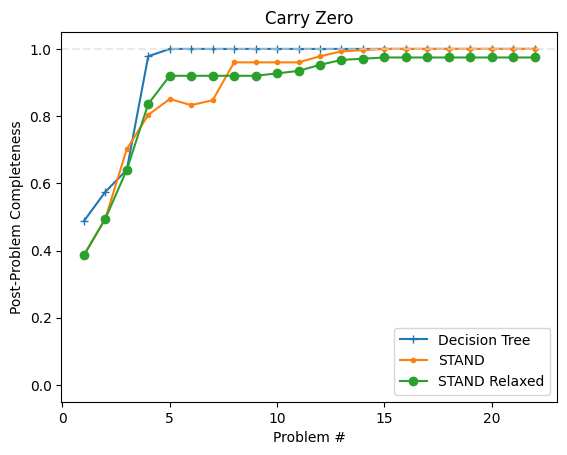

In [8]:
plot_cmp({"Decision Tree":log_dt_cz,  "STAND": log_stand_cz, "STAND Relaxed": log_standr_cz}, "Carry Zero")

In [9]:
for uid, skill in stand_agent.skills.items():
    print(skill)
    print(skill.when_lrn_mech.classifier)
    print()

Skill_JjoGt(OnesDigit(a + b))


/home/danny/.local/lib/python3.9/site-packages/numba/typed/typeddict.py:39: NumbaTypeSafetyWarning: unsafe cast from int64 to int32. Precision may be lost.
  return d[key]


TREE w/ classes: [ 1 -1]
NODE(0) : (Sel.above.above.above.value,=='1')[F:1 T:2] 
	(Sel.right.above.above.value,=='7')[F:3 T:4] 
	(TF(SkillCand:, s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))), SK_9VBzwWpYiWUSNv4qbP1CXEYBHXSzRa, Sel, Sel.above.above.above, Sel.above, Sel.above.above),==None)[F:2 T:1] 
NODE(1) : (Sel.above.above.above.locked,==True)[F:15 T:14] 
	(TF(SkillCand:, s(TensDigit(f8(a.value) + f8(b.value))), SK_YqS1f6tj2UQwiYQBBTS19LUhGAHJzj, Sel.above.above.above, Sel.right.above, Sel.right.above.above),==None)[F:15 T:14] 
LEAF(2) : [0 3]
NODE(3) : (Sel.above.above.above.locked,==True)[F:5 T:6] 
	(Sel.above.left.above.value,=='5')[F:7 T:8] 
	(Sel.above.above.above.value,=='1')[F:7 T:8] 
	(Sel.right.locked,==False)[F:9 T:10] 
	(Sel.right.above.above.value,=='8')[F:6 T:5] 
	(Sel.right.value,=='')[F:9 T:10] 
	(Sel.right.right.above.above.value,=='7')[F:6 T:5] 
	(Sel.right.right.value,=='1')[F:6 T:5] 
	(TF(SkillCand:, s(TensDigit(f8(a.value) + f8(b.value))), SK_YqS1f6tj2UQw

In [10]:
for uid, skill in dt_agent.skills.items():
    print(skill)
    print(skill.when_lrn_mech.classifier)
    print()

Skill_eUmOF(OnesDigit(a + b))
TREE w/ classes: [ 1 -1]
NODE(0) : (Sel.above.above.above.locked,==True)[F:1 T:2] 
LEAF(1) : [0 3]
NODE(2) : (Sel.above.above.above.value,=='1')[F:3 T:4] 
NODE(3) : (Sel.right.locked,==False)[F:5 T:6] 
LEAF(4) : [0 2]
LEAF(5) : [42  0]
LEAF(6) : [0 1]

Skill_PZOfg(TensDigit(a + b))
TREE w/ classes: [ 1 -1]
NODE(0) : (Sel.right.locked,==True)[F:1 T:2] 
LEAF(1) : [0 3]
NODE(2) : (Sel.below.below.right.right.below.locked,==False)[F:3 T:4] 
NODE(3) : (Sel.right.value,=='1')[F:5 T:6] 
LEAF(4) : [0 2]
NODE(5) : (Sel.right.below.right.below.below.locked,==False)[F:7 T:8] 
LEAF(6) : [0 1]
LEAF(7) : [42  0]
LEAF(8) : [0 1]

Skill_mVteA(OnesDigit(a + b + c))
TREE w/ classes: [ 1 -1]
NODE(0) : (Sel.right.locked,==True)[F:1 T:2] 
LEAF(1) : [0 1]
LEAF(2) : [24  0]

Skill_4py9T(TensDigit(a + b + c))
TREE w/ classes: [ 1 -1]
NODE(0) : (Sel.below.below.right.right.below.locked,==False)[F:1 T:2] 
NODE(1) : (Sel.right.below.right.below.below.locked,==False)[F:3 T:4] 
LEAF(2

## Skip Zero

In [11]:
stand_agent = CREAgent(**agent_args, **stand_args)
log_stand_sz = run_training(stand_agent, carry_zero=False)

STARTING PROBLEM ['534', '698']
TensDigit(f8(a.value) + f8(a.value) + f8(a.value)) [TextField(id='inpB1', value='8', locked=True)]
TensDigit(f8(a.value) + f8(a.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
OnesDigit(f8(a.value) + f8(a.value) + f8(a.value)) [TextField(id='inpA1', value='4', locked=True)]
OnesDigit(f8(a.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
--FUNCS--
s(OnesDigit(f8(a.value) + f8(b.value))) ['inpB1', 'inpA1']
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) ['inpB1', 'inpA1']
EXPLAIN TIME: 1.680420 ms
SPLIT CHOICE: all_max
INDUCE SKILL Skill_oRs5Z(OnesDigit(a + b)) s(OnesDigit(f8(a.value) + f8(b.value)))
WILL LEARN False 0.0
fit option_tree: 0.07 ms
fit_spec_ext: 0.01 ms
('out1', 'UpdateTextField', {'value': '2'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
TensDigit(f8(a.value) + f8(b.value) + f8(b.value)) [Tex

WILL LEARN False 0.0
fit option_tree: 0.15 ms
fit_spec_ext: 0.01 ms
('out1', 'UpdateTextField', {'value': '2'}) ('out1', 'UpdateTextField', {'value': '2'}) True
('out2', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '2'}) False
('carry2', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '2'}) False
('done', 'PressButton', {'value': -1}) ('out1', 'UpdateTextField', {'value': '2'}) False
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA1', value='4', locked=True), TextField(id='inpB1', value='8', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
CAND SAI(out1, UpdateTextField, {'value': '2'}) Target SAI(out1, UpdateTextField, {'value': '2'})
CAND SAI(out1, UpdateTextField, {'value': '2'}) Target SAI(out1, UpdateTextField, {'value': '2'})
--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value))) out1 ['inpB1', 'inpA1']
EXPLAIN TIME: 4.465

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out3 ['carry2', 'inpB3', 'inpA3']
EXPLAIN TIME: 7.656494 ms
WILL LEARN False 0.0
fit option_tree: 0.17 ms
fit_spec_ext: 0.01 ms
('out3', 'UpdateTextField', {'value': '2'}) ('out4', 'UpdateTextField', {'value': '1'}) False
('out4', 'UpdateTextField', {'value': '1'}) ('out4', 'UpdateTextField', {'value': '1'}) True
('done', 'PressButton', {'value': -1}) ('out4', 'UpdateTextField', {'value': '1'}) False
s(f8(a.value)) [TextField(id='carry3', value='1', locked=True)]
a.value [TextField(id='carry3', value='1', locked=True)]
CAND SAI(out4, UpdateTextField, {'value': '1'}) Target SAI(out4, UpdateTextField, {'value': '1'})
CAND SAI(out4, UpdateTextField, {'value': '1'}) Target SAI(out4, UpdateTextField, {'value': '1'})
--SKILLS--
s(f8(a.value)) out4 ['carry3']
EXPLAIN TIME: 3.747803 ms
WILL LEARN True 2.0
fit option_tree: 0.10 ms
fit_spec_ext: 0.01 ms
CORRECT: out3 -> {'value': '2'}
INCORRECT: out4 -> {'value': '1'}
APPLY: out3 -

42 >> 333 + 333
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

44 >> 999 + 001
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

45 >> 999 + 001
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

46 >> 999 + 001
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

47 >> 999 + 001
AGENT:
{'selection': 'carry2', 'action_

140 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

141 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

142 >> 287 + 134
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

143 >> 287 + 134
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value

189 >> 764 + 335
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

190 >> 764 + 335
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

191 >> 764 + 335
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

192 >> 764 + 335
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

193 >> 764 + 335
AGENT:
{'selection': 'out4', 'action_type

a.value [TextField(id='carry2', value='1', locked=True)]
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI(carry3, UpdateTextField, {'value': '1'})
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI(carry3, UpdateTextField, {'value': '1'})
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI(carry3, UpdateTextField, {'value': '1'})
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI(carry3, UpdateTextField, {'value': '1'})
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI(carry3, UpdateTextField, {'value': '1'})
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI(carry3, UpdateTextField, {'value': '1'})
--SKILLS--
s(TensDigit(f8(a.value) + f8(b.value) + f8(c.value))) carry3 ['carry2', 'inpB3', 'inpA3']
EXPLAIN TIME: 7.561523 ms
WILL LEARN True 99.5
fit option_tree: 0.25 ms
fit_spec_ext: 0.01 ms
('out3', 'UpdateTextField', {'value': '1'}) ('out2', 'UpdateTextField', {'value': '4'}) False
('out2', 'UpdateTextField', {'value': '4'}

53 >> 999 + 001
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

55 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

62 >> 999 + 010
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateText

124 >> 872 + 371
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
----------------------

125 >> 872 + 371
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

133 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateText

165 >> 234 + 142
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

166 >> 234 + 142
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
----------------------

167 >> 234 + 142
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
----------------------

168 >> 234 + 142
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs':

207 >> 337 + 337
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

208 >> 337 + 337
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

209 >> 337 + 337
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

210 >> 337 + 337
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inpu

--SKILLS--
s(TensDigit(f8(a.value) + f8(b.value))) carry1 ['inpB1', 'inpA1']
EXPLAIN TIME: 4.623047 ms
WILL LEARN False 0.0
fit option_tree: 0.30 ms
fit_spec_ext: 0.02 ms
('out3', 'UpdateTextField', {'value': '2'}) ('carry2', 'UpdateTextField', {'value': '0'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('carry2', 'UpdateTextField', {'value': '0'}) False
('carry2', 'UpdateTextField', {'value': '0'}) ('carry2', 'UpdateTextField', {'value': '0'}) True
('carry1', 'UpdateTextField', {'value': '1'}) ('carry2', 'UpdateTextField', {'value': '0'}) False
('done', 'PressButton', {'value': -1}) ('carry2', 'UpdateTextField', {'value': '0'}) False
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpA2', value='3', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA2', value='3', locked=True), TextField(id='inpB2', value='4', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB2', value='4', locked=True), TextField(id='inpA2', value='3', locked=

10 >> 777 + 777
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

12 >> 773 + 773
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

14 >> 773 + 773
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTe

85 >> 999 + 011
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

86 >> 999 + 011
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

91 >> 999 + 011
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

93 >> 999 + 110
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value'

166 >> 234 + 142
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
----------------------

167 >> 234 + 142
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}


208 >> 337 + 337
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

211 >> 337 + 337
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

212 >> 337 + 337
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_

fit option_tree: 0.58 ms
fit_spec_ext: 0.01 ms
INCORRECT: carry3 -> {'value': '0'}
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
('out1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_oRs5Z(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='4', locked=True), TextField(id='inpA1', value='7', locked=True)]
('out3', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) True
('carry2', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '2'}) ('out1', 'UpdateTextField', {'value': '1'}) Fal

62 >> 999 + 010
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

66 >> 999 + 100
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

67 >> 999 + 100
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}

153 >> 643 + 534
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
----------------------

154 >> 643 + 534
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

155 >> 643 + 534
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

156 >> 643

13 >> 773 + 773
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

14 >> 773 + 773
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

34 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

36 >> 377 + 377
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs

126 >> 872 + 371
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

127 >> 872 + 371
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

128 >> 872 + 371
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'carry3', 'action_type

fit option_tree: 1.02 ms
fit_spec_ext: 0.03 ms
('out3', 'UpdateTextField', {'value': '3'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('out1', 'UpdateTextField', {'value': '5'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('carry2', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
('carry3', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('done', 'PressButton', {'value': -1}) ('carry1', 'UpdateTextField', {'value': '1'}) False
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpA1', value='8', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA1', value='8', locked=True), TextField(id='inpB1', value='7', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inp

45 >> 999 + 001
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

51 >> 999 + 001
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

56 >> 999 + 010
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

57 >> 999 + 010
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'valu

146 >> 287 + 134
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

150 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

170 >> 539 + 461
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

176 >> 539 + 461
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value'

10 >> 777 + 777
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

13 >> 773 + 773
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

14 >> 773 + 773
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

17 >> 773 + 773
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1

170 >> 539 + 461
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

176 >> 539 + 461
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

178 >> 539 + 461
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

181 >> 433 + 576
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value':

WILL LEARN False 0.0
fit option_tree: 0.26 ms
fit_spec_ext: 0.01 ms
CORRECT: out4 -> {'value': '1'}
APPLY: out4 -> {'value': '1'}
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
CHECK: 1 Skill_xh5vk(-1)(done) -> SAI(done, PressButton, {'value': -1}) []
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
--SKILLS--
-1 done []
EXPLAIN TIME: 1.576904 ms
WILL LEARN False 0.0
fit option_tree: 0.26 ms
fit_spec_ext: 0.01 ms
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
('out1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_oRs5Z(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '0'}) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='9', locked=True)]
('out3', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '0'}) False
('out2', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextFi

33 >> 377 + 377
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
----------------------

35 >> 377 + 377
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
----------------------

36 >> 377 + 377
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
TRUTH:
{'selection': 'out3', 'action_type': '

181 >> 433 + 576
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

182 >> 433 + 576
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

200 >> 533 + 698
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

210 >> 337 + 337
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inpu

14 >> 773 + 773
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

16 >> 773 + 773
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
----------------------

18 >> 773 + 773
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'out3', 'action_ty

124 >> 872 + 371
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
----------------------

125 >> 872 + 371
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

126 >> 872 + 371
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry3', 'action_type': 'UpdateText

Correctness : 84.93%
Completeness : 69.86%
STARTING PROBLEM ['764', '335']
('out1', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) True
CHECK: 1 Skill_oRs5Z(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '9'}) [TextField(id='inpB1', value='5', locked=True), TextField(id='inpA1', value='4', locked=True)]
('out3', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('out2', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('out1', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) True
('carry2', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '9'}) False
('done', 'PressButton', {'value': -1}) ('out1', 'UpdateTextFiel

24 >> 737 + 737
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
----------------------

33 >> 377 + 377
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
----------------------

35 >> 377 + 377
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'out2', 'action_type': '

126 >> 872 + 371
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

127 >> 872 + 371
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

128 >> 872 + 371
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'carry3', 'action_ty

200 >> 533 + 698
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

202 >> 533 + 698
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

204 >> 533 + 698
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'out3', 'action_type

s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpA3', value='5', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='inpB3', value='6', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB3', value='6', locked=True), TextField(id='inpA3', value='5', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpB3', value='6', locked=True)]
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI(carry3, UpdateTextField, {'value': '1'})
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI(carry3, UpdateTextField, {'value': '1'})
--SKILLS--
s(TensDigit(f8(a.value) + f8(b.value))) carry3 ['inpB3', 'inpA3']
EXPLAIN TIME: 6.870117 ms
WILL LEARN False 0.0
fit option_tree: 0.89 ms
fit_spec_ext: 0.03 ms
('out3', 'UpdateTextField', {'value': '1'}) ('carry2', 'UpdateTextField', {'value': '1'}) False
('carry2', 'UpdateTextField', {'value': '1'}) ('carry2', 'UpdateTextField', {'value

s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA2', value='3', locked=True), TextField(id='inpB2', value='9', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB2', value='9', locked=True), TextField(id='inpA2', value='3', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpB2', value='9', locked=True)]
CAND SAI(carry2, UpdateTextField, {'value': '1'}) Target SAI(carry2, UpdateTextField, {'value': '1'})
CAND SAI(carry2, UpdateTextField, {'value': '1'}) Target SAI(carry2, UpdateTextField, {'value': '1'})
--SKILLS--
s(TensDigit(f8(a.value) + f8(b.value))) carry2 ['inpB2', 'inpA2']
EXPLAIN TIME: 5.080811 ms
WILL LEARN True 576.0
fit option_tree: 1.37 ms
fit_spec_ext: 0.07 ms
CORRECT: out1 -> {'value': '1'}
INCORRECT: carry2 -> {'value': '1'}
APPLY: out1 -> {'value': '1'}
('out2', 'UpdateTextField', {'value': '3'}) ('out2', 'UpdateTextField', {'value': '3'}) True
CHECK: 1 Skill_u87Ai(OnesDigit(a + b + c))(out2, carry1, inpB2, inpA2) -> S

31 >> 377 + 377
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

34 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

37 >> 377 + 377
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

43 >> 333 + 333
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'

147 >> 287 + 134
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

148 >> 287 + 134
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

150 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

159 >> 248 + 137
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection

WILL LEARN False 0.0
fit option_tree: 0.52 ms
fit_spec_ext: 0.02 ms
CORRECT: carry3 -> {'value': '1'}
APPLY: carry3 -> {'value': '1'}
('out4', 'UpdateTextField', {'value': '1'}) ('out4', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_BNji9(a)(out4, carry3) -> SAI(out4, UpdateTextField, {'value': '1'}) [TextField(id='carry3', value='1', locked=True)]
('out4', 'UpdateTextField', {'value': '1'}) ('out4', 'UpdateTextField', {'value': '1'}) True
('done', 'PressButton', {'value': -1}) ('out4', 'UpdateTextField', {'value': '1'}) False
s(f8(a.value)) [TextField(id='carry3', value='1', locked=True)]
a.value [TextField(id='carry3', value='1', locked=True)]
CAND SAI(out4, UpdateTextField, {'value': '1'}) Target SAI(out4, UpdateTextField, {'value': '1'})
CAND SAI(out4, UpdateTextField, {'value': '1'}) Target SAI(out4, UpdateTextField, {'value': '1'})
--SKILLS--
s(f8(a.value)) out4 ['carry3']
EXPLAIN TIME: 3.774902 ms
REPLACING FEEDBACK Skill_BNji9(a)(out4, carry3) -> SAI(out4, UpdateTextFi

14 >> 773 + 773
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

31 >> 377 + 377
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

37 >> 377 + 377
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

43 >> 333 + 333
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs

180 >> 433 + 576
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

212 >> 337 + 337
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

Correctness : 89.95%
Completeness : 85.39%
STARTING PROBLEM ['872', '371']
('out1', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '3'}) True
CHECK: 1 Skill_oRs5Z(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '3'}) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='2', locked=True)]
('out3', 'UpdateTextField', {

12 >> 773 + 773
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

14 >> 773 + 773
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

31 >> 377 + 377
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

37 >> 377 + 377
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inpu

212 >> 337 + 337
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

Correctness : 90.87%
Completeness : 84.93%
STARTING PROBLEM ['839', '445']
('out1', 'UpdateTextField', {'value': '4'}) ('out1', 'UpdateTextField', {'value': '4'}) True
CHECK: 1 Skill_oRs5Z(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '4'}) [TextField(id='inpB1', value='5', locked=True), TextField(id='inpA1', value='9', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '4'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_CxFsO(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='

fit option_tree: 1.31 ms
fit_spec_ext: 0.04 ms
('out3', 'UpdateTextField', {'value': '2'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry2', 'UpdateTextField', {'value': '0'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) True
('carry2', 'UpdateTextField', {'value': '0'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('done', 'PressButton', {'value': -1}) ('carry3', 'UpdateTextField', {'value': '1'}) False
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpA3', value='8', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA3', value='8', locked=True), TextField(id='inpB3', value='4', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB3', value='4', locked=True), TextField(id='inpA3', value='8', locked=True)]
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI(carry3, UpdateTextField, {'value': '1'})
CAND SAI(carr

12 >> 773 + 773
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

14 >> 773 + 773
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

31 >> 377 + 377
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

37 >> 377 + 377
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inpu

212 >> 337 + 337
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

Correctness : 90.87%
Completeness : 85.39%
STARTING PROBLEM ['287', '134']
('done', 'PressButton', {'value': -1}) ('out1', 'UpdateTextField', {'value': '1'}) False
('done', 'PressButton', {'value': -1}) ('carry1', 'UpdateTextField', {'value': '1'}) False
CHECK: -1 Skill_xh5vk(-1)(done) -> SAI(done, PressButton, {'value': -1}) []
('out1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_oRs5Z(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='4', locked=True), TextField(id='inpA1', value='7', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'

31 >> 377 + 377
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

37 >> 377 + 377
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

43 >> 333 + 333
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

55 >> 999 + 010
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'

55 >> 999 + 010
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

72 >> 999 + 111
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

75 >> 999 + 111
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

83 >> 999 + 011
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inpu

s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpA2', value='4', locked=True), TextField(id='inpB2', value='3', locked=True), TextField(id='carry1', value='1', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpA2', value='4', locked=True), TextField(id='carry1', value='1', locked=True), TextField(id='inpB2', value='3', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpB2', value='3', locked=True), TextField(id='inpA2', value='4', locked=True), TextField(id='carry1', value='1', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpB2', value='3', locked=True), TextField(id='carry1', value='1', locked=True), TextField(id='inpA2', value='4', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='carry1', value='1', locked=True), TextField(id='inpA2', value='4', locked=True), TextField(id='inpB2', value='3', locked=True)]
s(OnesDigit(f8(

95 >> 999 + 110
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

106 >> 999 + 101
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

124 >> 872 + 371
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
----------------------

150 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inp

31 >> 377 + 377
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

37 >> 377 + 377
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

43 >> 333 + 333
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

55 >> 999 + 010
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'

31 >> 377 + 377
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

37 >> 377 + 377
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

43 >> 333 + 333
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

55 >> 999 + 010
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'

REPLACING FEEDBACK Skill_CxFsO(TensDigit(a + b))(carry2, inpB2, inpA2) -> SAI(carry2, UpdateTextField, {'value': '1'}) 1 -> 1 @ index 28
WILL LEARN False 0.0
fit option_tree: 0.82 ms
fit_spec_ext: 0.03 ms
CORRECT: carry2 -> {'value': '1'}
APPLY: carry2 -> {'value': '1'}
('out3', 'UpdateTextField', {'value': '0'}) ('out3', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_u87Ai(OnesDigit(a + b + c))(out3, carry2, inpB3, inpA3) -> SAI(out3, UpdateTextField, {'value': '0'}) [TextField(id='carry2', value='1', locked=True), TextField(id='inpB3', value='5', locked=True), TextField(id='inpA3', value='4', locked=True)]
('carry3', 'UpdateTextField', {'value': '1'}) ('out3', 'UpdateTextField', {'value': '0'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_8KuU0(TensDigit(a + b + c))(carry3, carry2, inpB3, inpA3) -> SAI(carry3, UpdateTextField, {'value': '1'}) [TextField(id='carry2', value='1', locked=True), TextField(id=

30 >> 377 + 377
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

31 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

32 >> 377 + 377
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'actio

37 >> 377 + 377
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

43 >> 333 + 333
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

94 >> 999 + 110
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

95 >> 999 + 110
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'

--SKILLS--
s(TensDigit(f8(a.value) + f8(b.value))) carry1 ['inpB1', 'inpA1']
EXPLAIN TIME: 5.103271 ms
REPLACING FEEDBACK Skill_CxFsO(TensDigit(a + b))(carry1, inpB1, inpA1) -> SAI(carry1, UpdateTextField, {'value': '1'}) 1 -> 1 @ index 32
WILL LEARN False 0.0
fit option_tree: 1.50 ms
fit_spec_ext: 0.08 ms
CORRECT: carry1 -> {'value': '1'}
APPLY: carry1 -> {'value': '1'}
('out2', 'UpdateTextField', {'value': '3'}) ('out2', 'UpdateTextField', {'value': '3'}) True
CHECK: 1 Skill_u87Ai(OnesDigit(a + b + c))(out2, carry1, inpB2, inpA2) -> SAI(out2, UpdateTextField, {'value': '3'}) [TextField(id='carry1', value='1', locked=True), TextField(id='inpB2', value='9', locked=True), TextField(id='inpA2', value='3', locked=True)]
('carry2', 'UpdateTextField', {'value': '1'}) ('out2', 'UpdateTextField', {'value': '3'}) False
('carry2', 'UpdateTextField', {'value': '1'}) ('carry2', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_8KuU0(TensDigit(a + b + c))(carry2, carry1, inpB2, inpA2) -> SAI(

37 >> 377 + 377
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

43 >> 333 + 333
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

94 >> 999 + 110
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

95 >> 999 + 110
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'

In [12]:
dt_agent = CREAgent(**agent_args, **dt_args)
log_dt_sz = run_training(dt_agent, carry_zero=False)

STARTING PROBLEM ['534', '698']
TensDigit(f8(a.value) + f8(a.value) + f8(a.value)) [TextField(id='inpB1', value='8', locked=True)]
TensDigit(f8(a.value) + f8(a.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
OnesDigit(f8(a.value) + f8(a.value) + f8(a.value)) [TextField(id='inpA1', value='4', locked=True)]
OnesDigit(f8(a.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
--FUNCS--
s(OnesDigit(f8(a.value) + f8(b.value))) ['inpB1', 'inpA1']
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) ['inpB1', 'inpA1']
EXPLAIN TIME: 1.333496 ms
INDUCE SKILL Skill_zx0oj(OnesDigit(a + b)) s(OnesDigit(f8(a.value) + f8(b.value)))
('out1', 'UpdateTextField', {'value': '2'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
TensDigit(f8(a.value) + f8(b.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out2 ['carry1', 'inpB2', 'inpA2']
EXPLAIN TIME: 7.819336 ms
INCORRECT: carry3 -> {'value': '1'}
CORRECT: out2 -> {'value': '3'}
APPLY: out2 -> {'value': '3'}
('out4', 'UpdateTextField', {'value': '1'}) ('out3', 'UpdateTextField', {'value': '2'}) False
CHECK: -1 Skill_h2zPf(a)(out4, carry3) -> SAI(out4, UpdateTextField, {'value': '1'}) [TextField(id='carry3', value='1', locked=True)]
('out3', 'UpdateTextField', {'value': '2'}) ('out3', 'UpdateTextField', {'value': '2'}) True
CHECK: 1 Skill_JycL2(OnesDigit(a + b + c))(out3, carry2, inpB3, inpA3) -> SAI(out3, UpdateTextField, {'value': '2'}) [TextField(id='carry2', value='1', locked=True), TextField(id='inpB3', value='6', locked=True), TextField(id='inpA3', value='5', locked=True)]
('out3', 'UpdateTextField', {'value': '2'}) ('out4', 'UpdateTextField', {'value': '1'}) False
('out4', 'UpdateTextField', {'value': '1'}) ('out4', 'UpdateTextField', {'value': '1'}) True
('done', 

45 >> 999 + 001
AGENT:
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

46 >> 999 + 001
AGENT:
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

55 >> 999 + 010
AGENT:
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

56 >> 999 + 010
AGENT:
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

57 >> 999 + 010
AGENT:
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

58 >> 999 + 010
AGENT:
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

64 >> 999 + 100
AGENT:
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': 

180 >> 433 + 576
AGENT:
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

181 >> 433 + 576
AGENT:
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

182 >> 433 + 576
AGENT:
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

183 >> 433 + 576
AGENT:
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

189 >> 764 + 335
AGENT:
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

190 >> 764 + 335
AGENT:
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

191 >> 764 + 335
AGENT:
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inpu

('out3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('out3', 'UpdateTextField', {'value': '2'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) True
('done', 'PressButton', {'value': -1}) ('carry3', 'UpdateTextField', {'value': '1'}) False
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) [TextField(id='inpA3', value='8', locked=True), TextField(id='inpB3', value='3', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) [TextField(id='inpA3', value='8', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='inpA3', value='8', locked=True), TextField(id='inpB3', value='3', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='inpA3

17 >> 773 + 773
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

18 >> 773 + 773
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
----------------------

19 >> 773 + 773
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

20 >> 773 + 773
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs':

45 >> 999 + 001
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

46 >> 999 + 001
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

47 >> 999 + 001
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'U

84 >> 999 + 011
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

85 >> 999 + 011
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

87 >> 999 + 011
AGENT:
{'selection': 'out2', 'action_type': 'Upd

191 >> 764 + 335
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

192 >> 764 + 335
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

193 >> 764 + 335
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------


CORRECT: carry3 -> {'value': '1'}
APPLY: carry3 -> {'value': '1'}
('out4', 'UpdateTextField', {'value': '1'}) ('out4', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_h2zPf(a)(out4, carry3) -> SAI(out4, UpdateTextField, {'value': '1'}) [TextField(id='carry3', value='1', locked=True)]
('carry2', 'UpdateTextField', {'value': '0'}) ('out4', 'UpdateTextField', {'value': '1'}) False
('carry2', 'UpdateTextField', {'value': '0'}) ('out4', 'UpdateTextField', {'value': '1'}) False
('out4', 'UpdateTextField', {'value': '1'}) ('out4', 'UpdateTextField', {'value': '1'}) True
('done', 'PressButton', {'value': -1}) ('out4', 'UpdateTextField', {'value': '1'}) False
s(f8(a.value)) [TextField(id='carry3', value='1', locked=True)]
a.value [TextField(id='carry3', value='1', locked=True)]
CAND SAI(out4, UpdateTextField, {'value': '1'}) Target SAI(out4, UpdateTextField, {'value': '1'})
CAND SAI(out4, UpdateTextField, {'value': '1'}) Target SAI(out4, UpdateTextField, {'value': '1'})
--SKILLS--
s(f8(a

30 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

31 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

33 >> 377 + 377
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
----------------------

34 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs':

68 >> 999 + 100
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

69 >> 999 + 100
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

70 >> 999 + 100
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'Upda

101 >> 999 + 110
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

102 >> 999 + 101
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

103 >> 999 + 101
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'Upda

189 >> 764 + 335
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

190 >> 764 + 335
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

191 >> 764 + 335
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type

('out3', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) True
('carry2', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('done', 'PressButton', {'value': -1}) ('out1', 'UpdateTextField', {'value': '1'}) False
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA1', value='7', locked=True), TextField(id='inpB1', value='4', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB1', value='4', locked=True), TextField(id='inpA1', value='7', locked=True)]
CAND SAI(out1, UpdateTextField, {'value': '1'}) Target SAI(out1, UpdateT

s(TensDigit(f8(a.value) + f8(a.value) + f8(a.value))) [TextField(id='inpA2', value='8', locked=True)]
--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out2 ['carry1', 'inpB2', 'inpA2']
EXPLAIN TIME: 8.008057 ms
CORRECT: out2 -> {'value': '2'}
APPLY: out2 -> {'value': '2'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 4 of 22
1 >> 777 + 777
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 

38 >> 377 + 377
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

41 >> 333 + 333
AGENT:
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

42 >> 333 + 333
AGENT:
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

51 >> 999 + 001
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

53 >> 999 + 001
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'out4', 'action_type

150 >> 287 + 134
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

153 >> 643 + 534
AGENT:
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
----------------------

154 >> 643 + 534
AGENT:
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

155 >> 643 + 534
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

156 >> 643 + 534
AGENT:
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
-----------------

CORRECT: out4 -> {'value': '1'}
APPLY: out4 -> {'value': '1'}
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
CHECK: 1 Skill_b8WFr(-1)(done) -> SAI(done, PressButton, {'value': -1}) []
('carry2', 'UpdateTextField', {'value': '0'}) ('done', 'PressButton', {'value': -1}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('done', 'PressButton', {'value': -1}) False
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
--SKILLS--
-1 done []
EXPLAIN TIME: 2.237305 ms
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
('out3', 'UpdateTextField', {'value': '1'}) ('out3', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_zx0oj(OnesDigit(a + b))(out3, inpB3, inpA3) -> SAI(out3, UpdateTextField, {'value': '1'}) [TextField(id='inpB3', value='5', locked=True), TextField(id='inpA3', value='6', locked=True)]
('out3', 'UpdateTextField', {'value': '1'}) ('out3', 'UpdateTextField', {'value': '1'}) True
('carry2', 'UpdateTex

43 >> 333 + 333
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

48 >> 999 + 001
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

49 >> 999 + 001
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

50 >> 999 + 001
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUT

96 >> 999 + 110
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

97 >> 999 + 110
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

98 >> 999 + 110
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField

129 >> 872 + 371
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

130 >> 872 + 371
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

131 >> 872 + 371
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

133 >> 839 + 445
AGENT:


--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value))) out1 ['inpB1', 'inpA1']
EXPLAIN TIME: 4.612793 ms
('out3', 'UpdateTextField', {'value': '3'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('out1', 'UpdateTextField', {'value': '5'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('carry2', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
('carry3', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('done', 'PressButton', {'value': -1}) ('carry1', 'UpdateTextField', {'value': '1'}) False
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpA1', value='8', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA1', value='8', locked=True), TextField(id='inpB1', value='7', locked=True)]
s(Te

14 >> 773 + 773
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

19 >> 773 + 773
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

21 >> 737 + 737
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type'

152 >> 643 + 534
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
----------------------

153 >> 643 + 534
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
----------------------

157 >> 643 + 534
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

173 >> 539 + 461
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value'

31 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

38 >> 377 + 377
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

48 >> 999 + 001
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

51 >> 999 + 001
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': 

133 >> 839 + 445
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

134 >> 839 + 445
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

140 >> 839 + 445
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_ty

s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpB1', value='1', locked=True)]
--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value))) out1 ['inpB1', 'inpA1']
EXPLAIN TIME: 5.146729 ms
CORRECT: out1 -> {'value': '0'}
APPLY: out1 -> {'value': '0'}
('out2', 'UpdateTextField', {'value': '0'}) ('out2', 'UpdateTextField', {'value': '0'}) True
CHECK: 1 Skill_JycL2(OnesDigit(a + b + c))(out2, carry1, inpB2, inpA2) -> SAI(out2, UpdateTextField, {'value': '0'}) [TextField(id='carry1', value='1', locked=True), TextField(id='inpB2', value='6', locked=True), TextField(id='inpA2', value='3', locked=True)]
('out3', 'UpdateTextField', {'value': '9'}) ('out2', 'UpdateTextField', {'value': '0'}) False
('out2', 'UpdateTextField', {'value': '9'}) ('out2', 'UpdateTextField', {'value': '0'}) False
('carry3', 'UpdateTextField', {'value': '0'}) ('out2', 'UpdateTextField', {'value': '0'}) False
('out3', 'UpdateTextField', {'value': '0'}) ('out2', 'UpdateTextField', {'value': '0'}) False
('out2', 'UpdateTe

1 >> 777 + 777
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

2 >> 777 + 777
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

5 >> 777 + 777
AGENT:
{'selection': 'carry2', 'action_type

127 >> 872 + 371
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

133 >> 839 + 445
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

134 >> 839 + 445
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1',

200 >> 533 + 698
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

212 >> 337 + 337
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

213 >> 733 + 733
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

214 >> 733 + 733
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': 

CORRECT: carry3 -> {'value': '1'}
APPLY: carry3 -> {'value': '1'}
('out4', 'UpdateTextField', {'value': '1'}) ('out4', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_h2zPf(a)(out4, carry3) -> SAI(out4, UpdateTextField, {'value': '1'}) [TextField(id='carry3', value='1', locked=True)]
('carry1', 'UpdateTextField', {'value': '0'}) ('out4', 'UpdateTextField', {'value': '1'}) False
('out4', 'UpdateTextField', {'value': '1'}) ('out4', 'UpdateTextField', {'value': '1'}) True
('done', 'PressButton', {'value': -1}) ('out4', 'UpdateTextField', {'value': '1'}) False
s(f8(a.value)) [TextField(id='carry3', value='1', locked=True)]
a.value [TextField(id='carry3', value='1', locked=True)]
CAND SAI(out4, UpdateTextField, {'value': '1'}) Target SAI(out4, UpdateTextField, {'value': '1'})
CAND SAI(out4, UpdateTextField, {'value': '1'}) Target SAI(out4, UpdateTextField, {'value': '1'})
--SKILLS--
s(f8(a.value)) out4 ['carry3']
EXPLAIN TIME: 3.575195 ms
CORRECT: out4 -> {'value': '1'}
APPLY: out4 -

43 >> 333 + 333
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

48 >> 999 + 001
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

64 >> 999 + 100
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {

196 >> 533 + 698
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

197 >> 533 + 698
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

200 >> 533 + 698
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'actio

31 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

37 >> 377 + 377
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

43 >> 333 + 333
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

48 >> 999 + 001
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

72 >> 999 + 111
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1

('out3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry2', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) True
('carry2', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('done', 'PressButton', {'value': -1}) ('carry3', 'UpdateTextField', {'value': '1'}) False
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='inpB3', value='6', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB3', value='6', locked=True), TextField(id='inpA3', value='5', locked=True)]
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI(carry3, UpdateTextField, {'value': '1'})
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI(carry3, UpdateTextField, {'value': '1'})
s(TensDigit(f8(a.value) + f8(a.value))) [TextF

31 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

37 >> 377 + 377
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

43 >> 333 + 333
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

48 >> 999 + 001
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry3',

165 >> 234 + 142
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

166 >> 234 + 142
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
----------------------

167 >> 234 + 142
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
----------------------

190 >> 764 + 335
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'sele

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out3 ['carry2', 'inpB3', 'inpA3']
EXPLAIN TIME: 7.164551 ms
REPLACING FEEDBACK Skill_JycL2(OnesDigit(a + b + c))(out3, carry2, inpB3, inpA3) -> SAI(out3, UpdateTextField, {'value': '2'}) 1 -> 1 @ index 4
CORRECT: out3 -> {'value': '2'}
APPLY: out3 -> {'value': '2'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 12 of 22
2 >> 777 + 777
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

31 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 

31 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

37 >> 377 + 377
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

42 >> 333 + 333
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

43 >> 333 + 333
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

48 >> 999 + 001
AGENT:
{'selection': 'carry2',

211 >> 337 + 337
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

212 >> 337 + 337
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

Correctness : 92.24%
Completeness : 85.39%
STARTING PROBLEM ['839', '445']
('out1', 'UpdateTextField', {'value': '4'}) ('out1', 'UpdateTextField', {'value': '4'}) True
CHECK: 1 Skill_zx0oj(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '4'}) [TextField(id='inpB1', value='5', locked=True), TextField(id='inpA1', value='9', locked=True)]
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '4'}) False
('carry1', 'Updat

31 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

37 >> 377 + 377
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

42 >> 333 + 333
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

43 >> 333 + 333
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

48 >> 999 + 001
AGENT:
{'selection': 'carry2',

('out3', 'UpdateTextField', {'value': '3'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('out1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('carry2', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
('carry3', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('done', 'PressButton', {'value': -1}) ('carry1', 'UpdateTextField', {'value': '1'}) False
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA1', value='7', locked=True), TextField(id='inpB1', value='4', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB1', value='4', locked=True), TextField(id='inpA1', value='7', locked=True)]
CAND SAI(carry1, UpdateTextField, {'value': '1'}) Target S

28 >> 737 + 737
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

31 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

38 >> 377 + 377
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

42 >> 333 + 333
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}

REPLACING FEEDBACK Skill_zx0oj(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '7'}) 1 -> 1 @ index 19
CORRECT: out1 -> {'value': '7'}
APPLY: out1 -> {'value': '7'}
('out2', 'UpdateTextField', {'value': '7'}) ('out2', 'UpdateTextField', {'value': '7'}) True
CHECK: 1 Skill_zx0oj(OnesDigit(a + b))(out2, inpB2, inpA2) -> SAI(out2, UpdateTextField, {'value': '7'}) [TextField(id='inpB2', value='3', locked=True), TextField(id='inpA2', value='4', locked=True)]
('out3', 'UpdateTextField', {'value': '1'}) ('out2', 'UpdateTextField', {'value': '7'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('out2', 'UpdateTextField', {'value': '7'}) True
('carry2', 'UpdateTextField', {'value': '0'}) ('out2', 'UpdateTextField', {'value': '7'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('out2', 'UpdateTextField', {'value': '7'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('out2', 'UpdateTextField', {'value': '7'}) False
('done', 'PressButton', {'value': -1}

31 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

37 >> 377 + 377
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

42 >> 333 + 333
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

43 >> 333 + 333
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

48 >> 999 + 001
AGENT:
{'selection': 'out3', '

37 >> 377 + 377
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

43 >> 333 + 333
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

48 >> 999 + 001
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

71 >> 999 + 111
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'ac

REPLACING FEEDBACK Skill_zx0oj(OnesDigit(a + b))(out3, inpB3, inpA3) -> SAI(out3, UpdateTextField, {'value': '3'}) 1 -> 1 @ index 28
CORRECT: out3 -> {'value': '3'}
APPLY: out3 -> {'value': '3'}
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
CHECK: 1 Skill_b8WFr(-1)(done) -> SAI(done, PressButton, {'value': -1}) []
('carry2', 'UpdateTextField', {'value': '0'}) ('done', 'PressButton', {'value': -1}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('done', 'PressButton', {'value': -1}) False
('carry3', 'UpdateTextField', {'value': '0'}) ('done', 'PressButton', {'value': -1}) False
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
--SKILLS--
-1 done []
EXPLAIN TIME: 1.839111 ms
REPLACING FEEDBACK Skill_b8WFr(-1)(done) -> SAI(done, PressButton, {'value': -1}) 1 -> 1 @ index 8
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

133 >> 839 + 445
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

134 >> 839 + 445
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

150 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_ty

s(TensDigit(f8(a.value) + f8(a.value) + f8(a.value))) [TextField(id='inpA2', value='3', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) [TextField(id='inpA2', value='3', locked=True), TextField(id='carry1', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='inpA2', value='3', locked=True), TextField(id='carry1', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='inpA2', value='3', locked=True), TextField(id='carry1', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='inpB2', value='6', locked=True), TextField(id='carry1', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='carry1', value='1', locked=True), TextField(id='inpA2', value='3', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='carry1', value='1', locked=True), TextField(id='inpA2', value='3', locked=True)

37 >> 377 + 377
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

43 >> 333 + 333
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

48 >> 999 + 001
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

71 >> 999 + 111
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'ac

s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) [TextField(id='inpA3', value='4', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='inpA3', value='4', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='inpA3', value='4', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='inpB3', value='5', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='carry2', value='1', locked=True), TextField(id='inpA3', value='4', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='carry2', value='1', locked=True), TextField(id='inpA3', value='4', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='carry2', value='1', locked=True

37 >> 377 + 377
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

43 >> 333 + 333
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

48 >> 999 + 001
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

71 >> 999 + 111
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'ac

('out3', 'UpdateTextField', {'value': '0'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry2', 'UpdateTextField', {'value': '0'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) True
('done', 'PressButton', {'value': -1}) ('carry3', 'UpdateTextField', {'value': '1'}) False
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpA3', value='7', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA3', value='7', locked=True), TextField(id='inpB3', value='3', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB3', value='3', locked=True), TextField(id='inpA3', value='7', locked=True)]
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI(carry3, UpdateTextField, {'value': '1'})
CAND SAI(carry3, UpdateTextField, {'value': '1'}) Target SAI

86 >> 999 + 011
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

88 >> 999 + 011
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

89 >> 999 + 011
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry3', 'a

CORRECT: out4 -> {'value': '1'}
APPLY: out4 -> {'value': '1'}
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
CHECK: 1 Skill_b8WFr(-1)(done) -> SAI(done, PressButton, {'value': -1}) []
('done', 'PressButton', {'value': -1}) ('done', 'PressButton', {'value': -1}) True
--SKILLS--
-1 done []
EXPLAIN TIME: 1.615723 ms
REPLACING FEEDBACK Skill_b8WFr(-1)(done) -> SAI(done, PressButton, {'value': -1}) 1 -> 1 @ index 13
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
('out1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) True
CHECK: 1 Skill_zx0oj(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '1'}) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='3', locked=True)]
('out3', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '2'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out1',

25 >> 737 + 737
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

26 >> 737 + 737
AGENT:
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

31 >> 377 + 377
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

37 >> 377 + 377
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

43 >> 333 + 333
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------

In [13]:
standr_agent = CREAgent(**{**agent_args, **stand_relaxed_args})
log_standr_sz = run_training(standr_agent, carry_zero=False)

STARTING PROBLEM ['534', '698']
TensDigit(f8(a.value) + f8(a.value) + f8(a.value)) [TextField(id='inpB1', value='8', locked=True)]
TensDigit(f8(a.value) + f8(a.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
OnesDigit(f8(a.value) + f8(a.value) + f8(a.value)) [TextField(id='inpA1', value='4', locked=True)]
OnesDigit(f8(a.value) + f8(b.value)) [TextField(id='inpB1', value='8', locked=True), TextField(id='inpA1', value='4', locked=True)]
--FUNCS--
s(OnesDigit(f8(a.value) + f8(b.value))) ['inpB1', 'inpA1']
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) ['inpB1', 'inpA1']
EXPLAIN TIME: 1.487061 ms
SPLIT CHOICE: all_near_max
INDUCE SKILL Skill_Ulubr(OnesDigit(a + b)) s(OnesDigit(f8(a.value) + f8(b.value)))
WILL LEARN False 0.0
fit option_tree: 0.08 ms
fit_spec_ext: 0.01 ms
('out1', 'UpdateTextField', {'value': '2'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
TensDigit(f8(a.value) + f8(b.value) + f8(b.value))

s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='inpB3', value='6', locked=True), TextField(id='inpA3', value='5', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='inpB3', value='6', locked=True), TextField(id='inpA3', value='5', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpB3', value='6', locked=True), TextField(id='inpA3', value='5', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) [TextField(id='inpB3', value='6', locked=True), TextField(id='inpA3', value='5', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value) + f8(a.value))) [TextField(id='inpB3', value='6', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value) + f8(b.value))) [TextField(id='inpB3', value='6', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpB3', value='6', locked=True), Te

45 >> 999 + 001
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

46 >> 999 + 001
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

47 >> 999 + 001
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

53 >> 999 + 001
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'valu

133 >> 839 + 445
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

134 >> 839 + 445
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

135 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '8'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

136 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}

199 >> 533 + 698
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
----------------------

207 >> 337 + 337
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

208 >> 337 + 337
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

209 >> 337 + 337
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value

WILL LEARN True 11.625
fit option_tree: 0.21 ms
fit_spec_ext: 0.01 ms
('out3', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '0'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '0'}) True
('out3', 'UpdateTextField', {'value': '2'}) ('carry1', 'UpdateTextField', {'value': '0'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '0'}) False
('done', 'PressButton', {'value': -1}) ('carry1', 'UpdateTextField', {'value': '0'}) False
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpA1', value='2', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA1', value='2', locked=True), TextField(id='inpB1', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='2', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpB1', value='1', locked=True)]
CAND S

19 >> 773 + 773
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

20 >> 773 + 773
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

21 >> 737 + 737
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTex

53 >> 999 + 001
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

55 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

62 >> 999 + 010
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateText

137 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

138 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

139 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

140 >> 839 + 445
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'in

180 >> 433 + 576
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

187 >> 433 + 576
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

188 >> 433 + 576
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'Press

s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpA2', value='3', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA2', value='3', locked=True), TextField(id='inpB2', value='4', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB2', value='4', locked=True), TextField(id='inpA2', value='3', locked=True)]
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpB2', value='4', locked=True)]
CAND SAI(carry2, UpdateTextField, {'value': '0'}) Target SAI(carry2, UpdateTextField, {'value': '0'})
CAND SAI(carry2, UpdateTextField, {'value': '0'}) Target SAI(carry2, UpdateTextField, {'value': '0'})
--SKILLS--
s(TensDigit(f8(a.value) + f8(b.value))) carry2 ['inpB2', 'inpA2']
EXPLAIN TIME: 5.725586 ms
WILL LEARN True 959.6571428571428
fit option_tree: 0.33 ms
fit_spec_ext: 0.02 ms
('out3', 'UpdateTextField', {'value': '2'}) ('out3', 'UpdateTextField', {'value': '2'}) True
('carry2', 'UpdateTextField', {'value': '0'}) ('out3', 'UpdateTextField',

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value))) out1 ['inpB1', 'inpA1']
EXPLAIN TIME: 4.956055 ms
WILL LEARN False 0.0
fit option_tree: 0.41 ms
fit_spec_ext: 0.03 ms
('out3', 'UpdateTextField', {'value': '2'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('out1', 'UpdateTextField', {'value': '4'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry2', 'UpdateTextField', {'value': '0'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) True
('out2', 'UpdateTextField', {'value': '8'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry2', 'UpdateTextField', {'value': '0'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('done', 'PressButton', {'value': -1}) ('carry3', 'UpdateTextField', {'value': '1'}) False
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpA3', 

53 >> 999 + 001
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

55 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

56 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

58 >> 999 + 010
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': 

111 >> 999 + 101
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

113 >> 534 + 698
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

114 >> 534 + 698
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_ty

193 >> 764 + 335
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

194 >> 764 + 335
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

196 >> 533 + 698
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'Updat

s(TensDigit(f8(a.value) + f8(a.value) + f8(a.value))) [TextField(id='inpA2', value='8', locked=True)]
--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out2 ['carry1', 'inpB2', 'inpA2']
EXPLAIN TIME: 8.511230 ms
WILL LEARN False 0.0
fit option_tree: 0.24 ms
fit_spec_ext: 0.13 ms
('out3', 'UpdateTextField', {'value': '3'}) ('carry2', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '1'}) ('carry2', 'UpdateTextField', {'value': '1'}) False
('carry2', 'UpdateTextField', {'value': '1'}) ('carry2', 'UpdateTextField', {'value': '1'}) True
('carry3', 'UpdateTextField', {'value': '0'}) ('carry2', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '2'}) ('carry2', 'UpdateTextField', {'value': '1'}) False
('carry2', 'UpdateTextField', {'value': '1'}) ('carry2', 'UpdateTextField', {'value': '1'}) True
('done', 'PressButton', {'value': -1}) ('carry2', 'UpdateTextField', {'value': '1'}) False
s(TensDigit(f8(a.value) + f8(a.val

8 >> 777 + 777
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

10 >> 777 + 777
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

12 >> 773 + 773
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateT

106 >> 999 + 101
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

109 >> 999 + 101
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

111 >> 999 + 101
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

115 >> 534 + 698
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'val

176 >> 539 + 461
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

178 >> 539 + 461
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

181 >> 433 + 576
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

182 >> 433 + 576


4 >> 777 + 777
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
----------------------

5 >> 777 + 777
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

6 >> 777 + 777
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
TRUTH:
{'selection': 'out2', 'action_type'

85 >> 999 + 011
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

87 >> 999 + 011
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

90 >> 999 + 011
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out3', 'action_type': '

162 >> 248 + 137
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '8'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '8'}}
----------------------

164 >> 248 + 137
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

168 >> 234 + 142
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

170 >> 539 + 461
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'sel

45 >> 999 + 001
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

47 >> 999 + 001
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

48 >> 999 + 001
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_

121 >> 534 + 698
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

124 >> 872 + 371
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
----------------------

125 >> 872 + 371
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateT

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value))) out1 ['inpB1', 'inpA1']
EXPLAIN TIME: 5.195312 ms
WILL LEARN False 0.0
fit option_tree: 0.50 ms
fit_spec_ext: 0.01 ms
CORRECT: out1 -> {'value': '6'}
APPLY: out1 -> {'value': '6'}
('out2', 'UpdateTextField', {'value': '7'}) ('out2', 'UpdateTextField', {'value': '7'}) True
CHECK: 1 Skill_Ulubr(OnesDigit(a + b))(out2, inpB2, inpA2) -> SAI(out2, UpdateTextField, {'value': '7'}) [TextField(id='inpB2', value='4', locked=True), TextField(id='inpA2', value='3', locked=True)]
('out3', 'UpdateTextField', {'value': '3'}) ('out2', 'UpdateTextField', {'value': '7'}) False
('out2', 'UpdateTextField', {'value': '7'}) ('out2', 'UpdateTextField', {'value': '7'}) True
('carry2', 'UpdateTextField', {'value': '0'}) ('out2', 'UpdateTextField', {'value': '7'}) False
('carry1', 'UpdateTextField', {'value': '0'}) ('out2', 'UpdateTextField', {'value': '7'}) False
('carry3', 'UpdateTextField', {'value': '0'}) ('out2', 'UpdateTextField', {'value': '7'}) False
(

107 >> 999 + 101
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

108 >> 999 + 101
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

109 >> 999 + 101
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type':

143 >> 287 + 134
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

145 >> 287 + 134
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}
----------------------

146 >> 287 + 134
AGENT:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '3'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'acti

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value))) out1 ['inpB1', 'inpA1']
EXPLAIN TIME: 5.077637 ms
WILL LEARN False 0.0
fit option_tree: 0.49 ms
fit_spec_ext: 0.01 ms
('out3', 'UpdateTextField', {'value': '9'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '9'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('out1', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('carry2', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('carry1', 'UpdateTextField', {'value': '1'}) True
('carry3', 'UpdateTextField', {'value': '0'}) ('carry1', 'UpdateTextField', {'value': '1'}) False
('done', 'PressButton', {'value': -1}) ('carry1', 'UpdateTextField', {'value': '1'}) False
s(TensDigit(f8(a.value) + f8(a.value))) [TextField(id='inpA1', value='9', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA1', value='9

s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpA2', value='3', locked=True), TextField(id='inpB2', value='6', locked=True), TextField(id='carry1', value='1', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpA2', value='3', locked=True), TextField(id='carry1', value='1', locked=True), TextField(id='inpB2', value='6', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpB2', value='6', locked=True), TextField(id='inpA2', value='3', locked=True), TextField(id='carry1', value='1', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpB2', value='6', locked=True), TextField(id='carry1', value='1', locked=True), TextField(id='inpA2', value='3', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='carry1', value='1', locked=True), TextField(id='inpA2', value='3', locked=True), TextField(id='inpB2', value='6', locked=True)]
s(OnesDigit(f8(

57 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

75 >> 999 + 111
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

94 >> 999 + 110
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'valu

s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='inpA3', value='4', locked=True), TextField(id='inpB3', value='5', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='inpA3', value='4', locked=True), TextField(id='inpB3', value='5', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpA3', value='4', locked=True), TextField(id='inpB3', value='5', locked=True), TextField(id='carry2', value='1', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpA3', value='4', locked=True), TextField(id='carry2', value='1', locked=True), TextField(id='inpB3', value='5', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(b.value))) [TextField(id='inpB3', value='5', locked=True), TextField(id='inpA3', value='4', locked=True)]
s(TensDigit(f8(a.value) + f8(b.value) + f8(a.value))) [TextField(id='inpB3', value='5', locked=True), TextField(id='inpA3', value='4', locked=True)]
s(TensDigi

56 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

66 >> 999 + 100
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

68 >> 999 + 100
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value'

197 >> 533 + 698
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

200 >> 533 + 698
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

Correctness : 94.98%
Completeness : 85.84%
STARTING PROBLEM ['764', '335']
('out1', 'UpdateTextField', {'value': '9'}) ('out1', 'UpdateTextField', {'value': '9'}) True
CHECK: 1 Skill_Ulubr(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '9'}) [TextField(id='inpB1', value=

31 >> 377 + 377
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

37 >> 377 + 377
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

40 >> 333 + 333
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

41 >> 333 + 333
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'va

133 >> 839 + 445
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '7'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

134 >> 839 + 445
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

136 >> 839 + 445
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '8'}}
{'selection': 'carry2', 'action_ty

WILL LEARN False 0.0
fit option_tree: 0.30 ms
fit_spec_ext: 0.01 ms
CORRECT: out2 -> {'value': '3'}
APPLY: out2 -> {'value': '3'}
('out3', 'UpdateTextField', {'value': '2'}) ('out3', 'UpdateTextField', {'value': '2'}) True
CHECK: 1 Skill_yVRBw(OnesDigit(a + b + c))(out3, carry2, inpB3, inpA3) -> SAI(out3, UpdateTextField, {'value': '2'}) [TextField(id='carry2', value='1', locked=True), TextField(id='inpB3', value='6', locked=True), TextField(id='inpA3', value='5', locked=True)]
('out3', 'UpdateTextField', {'value': '1'}) ('out3', 'UpdateTextField', {'value': '2'}) False
('out3', 'UpdateTextField', {'value': '2'}) ('out3', 'UpdateTextField', {'value': '2'}) True
('out4', 'UpdateTextField', {'value': '1'}) ('out3', 'UpdateTextField', {'value': '2'}) False
('done', 'PressButton', {'value': -1}) ('out3', 'UpdateTextField', {'value': '2'}) False
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='inpB3', value='6', locked=True)

150 >> 287 + 134
AGENT:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out4', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

159 >> 248 + 137
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
----------------------

160 >> 248 + 137
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTe

--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out2 ['carry1', 'inpB2', 'inpA2']
EXPLAIN TIME: 7.437988 ms
REPLACING FEEDBACK Skill_yVRBw(OnesDigit(a + b + c))(out2, carry1, inpB2, inpA2) -> SAI(out2, UpdateTextField, {'value': '3'}) 1 -> 1 @ index 3
WILL LEARN False 0.0
fit option_tree: 0.32 ms
fit_spec_ext: 0.01 ms
('out3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '2'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) True
('out3', 'UpdateTextField', {'value': '2'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '3'}) ('carry3', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '1'}) ('carry3', 'UpdateTextField', {'value': '1'}) True
('done', 'PressButton', {'value': -1}) ('carry3', 'UpdateTextField', {'value': '1'}) 

55 >> 999 + 010
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

56 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

66 >> 999 + 100

212 >> 337 + 337
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

Correctness : 87.67%
Completeness : 83.11%
STARTING PROBLEM ['872', '371']
('out1', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '3'}) True
CHECK: 1 Skill_Ulubr(OnesDigit(a + b))(out1, inpB1, inpA1) -> SAI(out1, UpdateTextField, {'value': '3'}) [TextField(id='inpB1', value='1', locked=True), TextField(id='inpA1', value='2', locked=True)]
('out3', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '3'}) False
('out2', 'UpdateTextField', {'value': '4'}) ('out1', 'UpdateTextField', {'value': '3'}) False
('out1', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '3'}) True
('carry2', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '3'}) False
('carry1', 'UpdateTextField', {'value':

s(TensDigit(f8(a.value) + f8(a.value) + f8(a.value))) [TextField(id='inpA3', value='8', locked=True)]
--SKILLS--
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) out3 ['carry2', 'inpB3', 'inpA3']
EXPLAIN TIME: 8.126953 ms
REPLACING FEEDBACK Skill_yVRBw(OnesDigit(a + b + c))(out3, carry2, inpB3, inpA3) -> SAI(out3, UpdateTextField, {'value': '2'}) 1 -> 1 @ index 6
WILL LEARN False 0.0
fit option_tree: 0.32 ms
fit_spec_ext: 0.01 ms
CORRECT: out3 -> {'value': '2'}
APPLY: out3 -> {'value': '2'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 13 of 22
5 >> 777 + 777
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

12 >> 773 + 773
AGENT:
{'selection': 'out1', 'action_type': 'Update

160 >> 248 + 137
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

161 >> 248 + 137
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '5'}}
----------------------

162 >> 248 + 137
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '8'}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '8'}}
----------------------

163 >> 248 + 137
AGENT:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
{'selec

37 >> 377 + 377
AGENT:
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

43 >> 333 + 333
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
TRUTH:
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
----------------------

55 >> 999 + 010
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

56 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'carry3', '

WILL LEARN True 14.0
fit option_tree: 0.82 ms
fit_spec_ext: 0.06 ms
('out3', 'UpdateTextField', {'value': '3'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out2', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('out1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) True
('carry2', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('carry1', 'UpdateTextField', {'value': '1'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('carry3', 'UpdateTextField', {'value': '0'}) ('out1', 'UpdateTextField', {'value': '1'}) False
('done', 'PressButton', {'value': -1}) ('out1', 'UpdateTextField', {'value': '1'}) False
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpA1', value='7', locked=True), TextField(id='inpB1', value='4', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value))) [TextField(id='inpB1', value='4', locked=True), TextField(id='inpA1', value='7', locked=True)]
CAND

12 >> 773 + 773
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

14 >> 773 + 773
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

55 >> 999 + 010
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

56 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs':

55 >> 999 + 010
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

56 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

66 >> 999 + 100

55 >> 999 + 010
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

56 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

66 >> 999 + 100

55 >> 999 + 010
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

56 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

66 >> 999 + 100

s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='inpB3', value='4', locked=True), TextField(id='carry2', value='1', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpA3', value='5', locked=True), TextField(id='carry2', value='1', locked=True), TextField(id='inpB3', value='4', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpB3', value='4', locked=True), TextField(id='inpA3', value='5', locked=True), TextField(id='carry2', value='1', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='inpB3', value='4', locked=True), TextField(id='carry2', value='1', locked=True), TextField(id='inpA3', value='5', locked=True)]
s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))) [TextField(id='carry2', value='1', locked=True), TextField(id='inpA3', value='5', locked=True), TextField(id='inpB3', value='4', locked=True)]
s(OnesDigit(f8(

12 >> 773 + 773
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '6'}}
----------------------

14 >> 773 + 773
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

55 >> 999 + 010
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

56 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs':

14 >> 773 + 773
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

31 >> 377 + 377
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

56 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inpu

31 >> 377 + 377
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
----------------------

56 >> 999 + 010
AGENT:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry2', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '0'}}
----------------------

65 >> 999 + 100
AGENT:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
{'selection': 'done', 'action_type': 'PressButton', 'inputs': {'value': -1}}
TRUTH:
{'selection': 'out2', 'action_type': 'UpdateTextField', 'inputs': {'value': '9'}}
----------------------

66 >> 999 + 100
AGENT:
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'va

WILL LEARN False 0.0
fit option_tree: 0.37 ms
fit_spec_ext: 0.01 ms
CORRECT: out3 -> {'value': '2'}
APPLY: out3 -> {'value': '2'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 22 of 22
1 >> 777 + 777
AGENT:
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'out1', 'action_type': 'UpdateTextField', 'inputs': {'value': '4'}}
----------------------

2 >> 777 + 777
AGENT:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
{'selection': 'carry3', 'action_type': 'UpdateTextField', 'inputs': {'value': '1'}}
TRUTH:
{'selection': 'carry1', 'action_type': 'UpdateTextField', 'inputs': {'value':

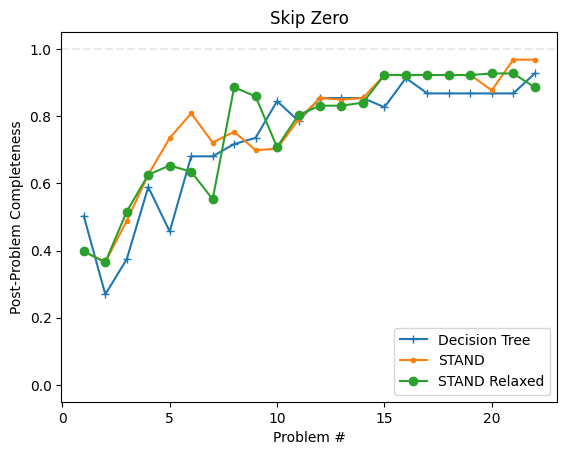

In [14]:
plot_cmp({"Decision Tree":log_dt_sz,  "STAND": log_stand_sz, "STAND Relaxed": log_standr_sz}, "Skip Zero")

In [15]:
for uid, skill in stand_agent.skills.items():
    print(skill)
    print(skill.when_lrn_mech.classifier)
    print()


Skill_oRs5Z(OnesDigit(a + b))
TREE w/ classes: [ 1 -1]
NODE(0) : (TF(SkillCand:, s(TensDigit(f8(a.value) + f8(b.value))), SK_CxFsOXPaKVakUb4EgwY27vWcOyUVwW, Sel.above.above.above, Sel.right.above, Sel.right.above.above),=='1')[F:1 T:2] 
NODE(1) : (Sel.above.above.value,=='5')[F:3 T:4] 
	(Sel.above.above.above.value,=='')[F:5 T:6] 
	(Sel.right.right.above.value,=='1')[F:7 T:8] 
	(TF(SkillCand:, s(OnesDigit(f8(a.value) + f8(b.value) + f8(c.value))), SK_u87AiT5ocSfa7hutjLcuoIy3YyRSbA, Sel, Sel.above.above.above, Sel.above, Sel.above.above),==None)[F:5 T:6] 
	(TF(SkillCand:, s(TensDigit(f8(a.value) + f8(b.value) + f8(c.value))), SK_8KuU0WV769ppwQpgGxiCTZU8V85yAF, Sel.above.left.above.above, Sel.above.above.above, Sel.above, Sel.above.above),==None)[F:5 T:6] 
LEAF(2) : [0 4]
NODE(3) : (Sel.above.above.above.value,=='')[F:16 T:9] 
	(Sel.right.locked,==False)[F:17 T:12] 
	(Sel.right.above.above.value,=='7')[F:9 T:16] 
	(Sel.right.above.value,=='7')[F:9 T:16] 
	(Sel.right.value,=='4')[F:9 T:16

In [16]:
for uid, skill in dt_agent.skills.items():
    print(skill)
    print(skill.when_lrn_mech.classifier)
    print()

Skill_zx0oj(OnesDigit(a + b))
TREE w/ classes: [ 1 -1]
NODE(0) : (TF(SkillCand:, s(TensDigit(f8(a.value) + f8(b.value))), SK_clD0o9iiMyCTdHxI0Hzp83i8M2BWVN, Sel.above.above.above, Sel.right.above, Sel.right.above.above),=='1')[F:1 T:2] 
NODE(1) : (Sel.above.above.above.value,=='')[F:3 T:4] 
LEAF(2) : [0 4]
LEAF(3) : [0 2]
NODE(4) : (Sel.right.locked,==False)[F:5 T:6] 
NODE(5) : (Sel.above.above.value,=='5')[F:7 T:8] 
LEAF(6) : [0 2]
LEAF(7) : [32  0]
LEAF(8) : [0 1]

Skill_clD0o(TensDigit(a + b))
TREE w/ classes: [ 1 -1]
NODE(0) : (TF(SkillCand:, s(TensDigit(f8(a.value) + f8(b.value))), SK_clD0o9iiMyCTdHxI0Hzp83i8M2BWVN, Sel, Sel.below.right.below, Sel.right.below),=='1')[F:1 T:2] 
NODE(1) : (Sel.right.below.below.value,=='7')[F:3 T:4] 
LEAF(2) : [12  0]
NODE(3) : (TF(SkillCand:, s(TensDigit(f8(a.value) + f8(b.value))), SK_clD0o9iiMyCTdHxI0Hzp83i8M2BWVN, Sel.right, Sel.right.right.below.below, Sel.right.right.below),=='0')[F:7 T:8] 
NODE(4) : (Sel.right.below.right.below.below.locked,=